[Assignment 3, Individual Assignment]- Final Project

**Course:** Fall 2025 Machine Learning (`DAMO-640-10`)  
**Student Name:** `Fabio dos Santos Prumucena`  **Student Code:** `NF1002000`
**Professor:** Ahmed Eltahawi

[Support information about the development can be found in the `public github repo` at https://github.com/prumucena1979/MLFINAL]

---

## **Code Walkthrough: Technical Implementation Overview**

### **1. Preprocessing**

**Data Loading:** Dataset loaded directly from UCI Repository (https://archive.ics.uci.edu/dataset/236/seeds) (fall back to local dataset if that doesn't work). `Automatic download` and extraction from ZIP file. Parsed with `delim_whitespace=True` for space-separated values. Column names assigned per requirements. `Fallback to local file` if web unavailable.

**Train-Test Split:** 80/20 with `stratify=y` for balanced classes.

**Scaling:** `StandardScaler` normalizes features to ~zero mean for faster training.

**Augmentation:** `Noise injection (σ=0.02)` on training set only to reduce overfitting.

### **2. Model Architecture**

**MLP (7→64→32→3):** Input (7 features) → Hidden1 (64) → Hidden2 (32) → Output (3 classes). `ReLU activations`, `Softmax output`. Sparse Categorical Crossentropy loss, `Adam` optimizer.

### **3. Regularization**

**Final Model:** `Dropout (0.2)` applied after each of the 2 hidden layers for regularization.

**Architecture:** Dense → ReLU → Dropout (repeated for the 2 hidden layers: 64 units and 32 units)

Early Stopping `(patience=15)` prevents overfitting by monitoring validation loss.

### **4. Hyperparameters**

**Dropout Testing:** `0.2 (light) vs 0.4 (strong)` to find optimal regularization.

**Selection Criteria `(Tiebreaker Hierarchy)`:**
1. **F1-Score** (primary metric)
2. **Validation Loss** (lower = better generalization)
3. **Training Time** (faster = more efficient)
4. **Epochs to Convergence** (fewer = faster learning)
5. **Model Simplicity** (lower dropout = simpler when tied)

**Training:** 100 epochs, batch size 16, 20% validation split.

### **5. Validation Strategy**

**K-Fold Cross-Validation `(K=5)`:** Uses all 378 samples for robust performance estimation. `Provides confidence intervals and reduces bias from single train/test split`.

**Final Performance:** Mean Accuracy: `99.78% ± 0.15%` (highly stable model)

---


## **Task 1: Data Loading and Exploratory Data Analysis**

**Objective:** Load the Seeds dataset and perform initial exploratory analysis

**Sub-Tasks:**
- **Task 1.01:** Load the Seeds dataset and assign column names
- **Task 1.02:** Display class distribution and per-feature summary statistics (mean, std)

### **Task 1.01: Load the Seeds Dataset and Assign Column Names**

**Requirements:**
- `Load` Seeds `dataset` from UCI repository format
- `Assign` 8 `column names` (7 features + 1 class label)
- `Display` dataset `shape and first rows` for verification

In [143]:
#TASK 01.01: Load the Seeds dataset directly from UCI Repository
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import io

# Define column names
column_names = [
    'area',
    'perimeter',
    'compactness',
    'length_of_kernel',
    'width_of_kernel',
    'asymmetry_coefficient',
    'length_of_kernel_groove',
    'class'
]

# Method 1: Load directly from UCI Repository (RECOMMENDED)
print("Loading dataset from UCI Machine Learning Repository...")
print("URL: https://archive.ics.uci.edu/static/public/236/seeds.zip")

try:
    # Download and extract the dataset
    url = 'https://archive.ics.uci.edu/static/public/236/seeds.zip'
    
    # Download the ZIP file
    with urllib.request.urlopen(url) as response:
        zip_data = io.BytesIO(response.read())
    
    # Extract and read the dataset
    with zipfile.ZipFile(zip_data) as zip_file:
        # Read the seeds_dataset.txt file
        with zip_file.open('seeds_dataset.txt') as file:
            df = pd.read_csv(file, 
                           delim_whitespace=True,
                           names=column_names,
                           header=None,
                           encoding='utf-8')
    
    print("✓ Dataset loaded successfully from web!")
    
except Exception as e:
    print(f"⚠ Could not load from web: {e}")
    print("Falling back to local file...")
    
    # Fallback: Load from local file
    df = pd.read_csv('../../DATASET/seeds/seeds_dataset.txt', 
                     delim_whitespace=True,
                     names=column_names,
                     header=None)

# Confirmation: TASK 01 completed - Seeds dataset loaded successfully with 8 column names assigned
print("[TASK 01 COMPLETED] Seeds dataset loaded successfully")
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names assigned:")
print(df.columns.tolist())
print(f"\nFirst 5 rows:")
df.head()

Loading dataset from UCI Machine Learning Repository...
URL: https://archive.ics.uci.edu/static/public/236/seeds.zip
✓ Dataset loaded successfully from web!
[TASK 01 COMPLETED] Seeds dataset loaded successfully
Dataset shape: (210, 8)

Column names assigned:
['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'class']

First 5 rows:
✓ Dataset loaded successfully from web!
[TASK 01 COMPLETED] Seeds dataset loaded successfully
Dataset shape: (210, 8)

Column names assigned:
['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'class']

First 5 rows:


C:\Users\fabio\AppData\Local\Temp\ipykernel_66188\1468381260.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file,


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### **Task 1.02: Display Class Distribution and Summary Statistics**

**Metrics to Display:**
- `Class distribution` (count per wheat variety)
- Per-feature `summary statistic`s: mean and standard deviation

In [144]:
# TASK 1.02: Display class distribution and per-feature summary statistics (mean, std)

# Class distribution
print("=" * 60)
print("CLASS DISTRIBUTION")
print("=" * 60)
class_counts = df['class'].value_counts().sort_index()
print(class_counts)
print(f"\nTotal samples: {len(df)}")
print()

# Per-feature summary statistics (mean and std) for each class
print("=" * 60)
print("PER-FEATURE SUMMARY STATISTICS BY CLASS")
print("=" * 60)

for class_label in sorted(df['class'].unique()):
    print(f"\n{'='*60}")
    print(f"CLASS {class_label}")
    print(f"{'='*60}")
    class_data = df[df['class'] == class_label].drop('class', axis=1)
    
    # Calculate mean and std
    stats = pd.DataFrame({
        'Mean': class_data.mean(),
        'Std': class_data.std()
    })
    print(stats)

# Overall summary statistics
print(f"\n{'='*60}")
print("OVERALL SUMMARY STATISTICS (ALL CLASSES)")
print(f"{'='*60}")
overall_stats = df.drop('class', axis=1).describe().loc[['mean', 'std']]
print(overall_stats)

print("\n[TASK 1.02 COMPLETED] Class distribution and summary statistics displayed")

CLASS DISTRIBUTION
class
1    70
2    70
3    70
Name: count, dtype: int64

Total samples: 210

PER-FEATURE SUMMARY STATISTICS BY CLASS

CLASS 1
                              Mean       Std
area                     14.334429  1.215704
perimeter                14.294286  0.576583
compactness               0.880070  0.016191
length_of_kernel          5.508057  0.231508
width_of_kernel           3.244629  0.177616
asymmetry_coefficient     2.667403  1.173901
length_of_kernel_groove   5.087214  0.263699

CLASS 2
                              Mean       Std
area                     18.334286  1.439496
perimeter                16.135714  0.616995
compactness               0.883517  0.015500
length_of_kernel          6.148029  0.268191
width_of_kernel           3.677414  0.185539
asymmetry_coefficient     3.644800  1.181868
length_of_kernel_groove   6.020600  0.253934

CLASS 3
                              Mean       Std
area                     11.873857  0.723004
perimeter                13

## **Task 2: Data Preprocessing**

**Objective:** Prepare the dataset for neural network training

**Sub-Tasks:**
- **Task 2.01:** Check for `missing values` and handle if any
- **Task 2.02:** Split into `80% train / 20% test` with `fixed random seed`
- **Task 2.03:** Scale features using `StandardScaler`
- **Task 2.04:** Apply Noise Injection for `data augmentation`

### **Task 2.01: Check for Missing Values and Handle if Any**

**Data Quality Checks:**
- `Missing value` detection
- `NaN` and infinite value verification
- `Median imputation` strategy for numerical features (Although it was not necessary)

In [145]:
# TASK 2.01: Check for missing values and handle if any

print("=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)

# Check for missing values
missing_count = df.isnull().sum()
print("\nMissing values per column:")
print(missing_count)

total_missing = missing_count.sum()
print(f"\nTotal missing values: {total_missing}")

# Check for any NaN or infinite values
print("\n" + "=" * 60)
print("DATA QUALITY CHECK")
print("=" * 60)

for col in df.columns:
    nan_count = df[col].isna().sum()
    if df[col].dtype in ['float64', 'int64']:
        inf_count = np.isinf(df[col]).sum()
        print(f"{col}: {nan_count} NaN, {inf_count} Infinite values")
    else:
        print(f"{col}: {nan_count} NaN values")

# Handle missing values if any exist
if total_missing > 0:
    print("\n[WARNING] Missing values detected! Applying handling strategy...")
    # For numerical columns, fill with median
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['float64', 'int64']:
                median_value = df[col].median()
                df[col].fillna(median_value, inplace=True)
                print(f"  - Filled {col} missing values with median: {median_value:.4f}")
    
    # Verify after handling
    print("\nAfter handling:")
    print(f"Total missing values: {df.isnull().sum().sum()}")
else:
    print("\n[OK] No missing values found in the dataset")

print("\n[TASK 2.01 COMPLETED] Missing values checked and handled")

MISSING VALUES CHECK

Missing values per column:
area                       0
perimeter                  0
compactness                0
length_of_kernel           0
width_of_kernel            0
asymmetry_coefficient      0
length_of_kernel_groove    0
class                      0
dtype: int64

Total missing values: 0

DATA QUALITY CHECK
area: 0 NaN, 0 Infinite values
perimeter: 0 NaN, 0 Infinite values
compactness: 0 NaN, 0 Infinite values
length_of_kernel: 0 NaN, 0 Infinite values
width_of_kernel: 0 NaN, 0 Infinite values
asymmetry_coefficient: 0 NaN, 0 Infinite values
length_of_kernel_groove: 0 NaN, 0 Infinite values
class: 0 NaN, 0 Infinite values

[OK] No missing values found in the dataset

[TASK 2.01 COMPLETED] Missing values checked and handled


### **Task 2.02: Split into Train/Test Sets**

**Configuration:**
- Split ratio: 80% train / 20% test
- Fixed random seed: `42` (for reproducibility)
- Stratified split (maintains class distribution)

In [146]:
# TASK 2.02: Split into 80% train / 20% test with a fixed random seed

from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
RANDOM_SEED = 42

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=RANDOM_SEED,
    stratify=y  # Ensures class distribution is maintained in both sets
)

print("=" * 60)
print("TRAIN/TEST SPLIT")
print("=" * 60)
print(f"Random seed: {RANDOM_SEED}")
print(f"Split ratio: 80% train / 20% test")
print(f"\nOriginal dataset size: {len(df)}")
print(f"Training set size: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

# Verify class distribution
print("\n" + "=" * 60)
print("CLASS DISTRIBUTION IN SPLITS")
print("=" * 60)
print("\nTraining set:")
print(y_train.value_counts().sort_index())
print("\nTest set:")
print(y_test.value_counts().sort_index())

# Display shapes
print("\n" + "=" * 60)
print("DATASET SHAPES")
print("=" * 60)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\n[TASK 2.02 COMPLETED] Data split into 80% train / 20% test")

TRAIN/TEST SPLIT
Random seed: 42
Split ratio: 80% train / 20% test

Original dataset size: 210
Training set size: 168 (80.0%)
Test set size: 42 (20.0%)

CLASS DISTRIBUTION IN SPLITS

Training set:
class
1    56
2    56
3    56
Name: count, dtype: int64

Test set:
class
1    14
2    14
3    14
Name: count, dtype: int64

DATASET SHAPES
X_train shape: (168, 7)
X_test shape: (42, 7)
y_train shape: (168,)
y_test shape: (42,)

[TASK 2.02 COMPLETED] Data split into 80% train / 20% test


### **Task 2.03: Scale Features Using StandardScaler**

**Scaling Method:**
- `StandardScaler`: (X - mean) / std
- `Fitted on training data only` (prevents data leakage)
- Applied to both train and test sets (`using train results`)

In [147]:
# TASK 2.03: Scale features using StandardScaler

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("=" * 60)
print("FEATURE SCALING WITH STANDARDSCALER")
print("=" * 60)
print("StandardScaler applies: (X - mean) / std")
print("\nScaler fitted on training data and applied to both sets")

# Display scaling parameters
print("\n" + "=" * 60)
print("SCALING PARAMETERS (from training data)")
print("=" * 60)
scaling_params = pd.DataFrame({
    'Feature': X_train.columns,
    'Mean': scaler.mean_,
    'Std': scaler.scale_
})
print(scaling_params.to_string(index=False))

# Verify scaling results
print("\n" + "=" * 60)
print("SCALED DATA STATISTICS")
print("=" * 60)
print("\nTraining set (should have mean ≈ 0, std ≈ 1):")
train_stats = pd.DataFrame({
    'Mean': X_train_scaled.mean(),
    'Std': X_train_scaled.std()
})
print(train_stats)

print("\nTest set statistics:")
test_stats = pd.DataFrame({
    'Mean': X_test_scaled.mean(),
    'Std': X_test_scaled.std()
})
print(test_stats)

# Show sample of scaled data
print("\n" + "=" * 60)
print("SAMPLE OF SCALED TRAINING DATA (first 3 rows)")
print("=" * 60)
print(X_train_scaled.head(3))

print("\n[TASK 2.03 COMPLETED] Features scaled using StandardScaler")

FEATURE SCALING WITH STANDARDSCALER
StandardScaler applies: (X - mean) / std

Scaler fitted on training data and applied to both sets

SCALING PARAMETERS (from training data)
                Feature      Mean      Std
                   area 14.888393 2.896264
              perimeter 14.574464 1.297352
            compactness  0.871646 0.023829
       length_of_kernel  5.630905 0.438684
        width_of_kernel  3.266256 0.374400
  asymmetry_coefficient  3.687168 1.528632
length_of_kernel_groove  5.407518 0.491888

SCALED DATA STATISTICS

Training set (should have mean ≈ 0, std ≈ 1):
                                 Mean      Std
area                    -1.797504e-16  1.00299
perimeter               -8.035900e-16  1.00299
compactness              8.995450e-15  1.00299
length_of_kernel         6.344132e-16  1.00299
width_of_kernel         -2.881293e-16  1.00299
asymmetry_coefficient    2.114711e-16  1.00299
length_of_kernel_groove  1.131370e-15  1.00299

Test set statistics:
            

### **Task 2.04: Apply Noise Injection for Data Augmentation**

**Technique:**
- `Noise Injection` (Tabular Data Augmentation)
- Creates noisy copies of training samples to `increase dataset size`
- Acts as regularization `technique against overfitting`
- Applied only to training data (`test data remains unchanged`)

In [148]:
# TASK 2.04: Apply Noise Injection for Data Augmentation

# Augmentation parameters
AUGMENTATION_FACTOR = 19  # the training set size x 19 (no gain found further than that)
NOISE_LEVEL = 0.02       # Standard deviation for Gaussian noise (2% of scale)

print("=" * 60)
print("NOISE INJECTION FOR DATA AUGMENTATION")
print("=" * 60)
print(f"Augmentation Factor: {AUGMENTATION_FACTOR}x")
print(f"Noise Level (std): {NOISE_LEVEL}")

# Display original training set info
print("\n" + "=" * 60)
print("ORIGINAL TRAINING SET")
print("=" * 60)
print(f"Size: {len(X_train_scaled)} samples")
print(f"Shape: {X_train_scaled.shape}")
print("\nClass distribution:")
print(y_train.value_counts().sort_index())

# Create noisy copies
np.random.seed(42)  # For reproducibility
noisy_copies = []
y_copies = []

num_copies = AUGMENTATION_FACTOR - 1  # Subtract 1 because we keep the original

for copy_idx in range(num_copies):
    # Generate Gaussian noise with specified standard deviation
    noise = np.random.normal(0, NOISE_LEVEL, X_train_scaled.shape)
    
    # Add noise to create augmented copy
    X_noisy = X_train_scaled.values + noise
    
    # Convert back to DataFrame to maintain structure
    X_noisy_df = pd.DataFrame(X_noisy, columns=X_train_scaled.columns)
    
    noisy_copies.append(X_noisy_df)
    y_copies.append(y_train)
    
    print(f"\nCreated noisy copy {copy_idx + 1}/{num_copies}")

# Concatenate original data with noisy copies
X_train_augmented = pd.concat([X_train_scaled] + noisy_copies, axis=0, ignore_index=True)
y_train_augmented = pd.concat([y_train] + y_copies, axis=0, ignore_index=True)

print("\n" + "=" * 60)
print("AUGMENTED TRAINING SET")
print("=" * 60)
print(f"Original size: {len(X_train_scaled)} samples")
print(f"Augmented size: {len(X_train_augmented)} samples")
print(f"Increase: {len(X_train_augmented) - len(X_train_scaled)} samples " +
      f"({(len(X_train_augmented) / len(X_train_scaled) - 1) * 100:.1f}%)")

print("\nAugmented class distribution:")
print(y_train_augmented.value_counts().sort_index())

# Adjust labels for Keras (convert from 1,2,3 to 0,1,2)
y_train_augmented_adj = y_train_augmented - 1
y_train_adj = y_train - 1
y_test_adj = y_test - 1

print("\n" + "=" * 60)
print("LABEL ADJUSTMENT FOR KERAS")
print("=" * 60)
print("Original labels: 1, 2, 3")
print("Adjusted labels: 0, 1, 2")
print("(Required for sparse_categorical_crossentropy)")

print("\n" + "=" * 60)
print("AUGMENTATION SUMMARY")
print("=" * 60)
print(f"- Noise injection applied with {NOISE_LEVEL} standard deviation")
print(f"- Training set augmented from {len(X_train_scaled)} to {len(X_train_augmented)} samples")
print(f"- Class balance maintained across all augmented samples")
print(f"- Test set remains unchanged for unbiased evaluation")

print("\n[TASK 2.04 COMPLETED] Noise injection applied - training set augmented")
print("[NOTE] Test set (X_test_scaled, y_test) remains unchanged")

NOISE INJECTION FOR DATA AUGMENTATION
Augmentation Factor: 19x
Noise Level (std): 0.02

ORIGINAL TRAINING SET
Size: 168 samples
Shape: (168, 7)

Class distribution:
class
1    56
2    56
3    56
Name: count, dtype: int64

Created noisy copy 1/18

Created noisy copy 2/18

Created noisy copy 3/18

Created noisy copy 4/18

Created noisy copy 5/18

Created noisy copy 6/18

Created noisy copy 7/18

Created noisy copy 8/18

Created noisy copy 9/18

Created noisy copy 10/18

Created noisy copy 11/18

Created noisy copy 12/18

Created noisy copy 13/18

Created noisy copy 14/18

Created noisy copy 15/18

Created noisy copy 16/18

Created noisy copy 17/18

Created noisy copy 18/18

AUGMENTED TRAINING SET
Original size: 168 samples
Augmented size: 3192 samples
Increase: 3024 samples (1800.0%)

Augmented class distribution:
class
1    1064
2    1064
3    1064
Name: count, dtype: int64

LABEL ADJUSTMENT FOR KERAS
Original labels: 1, 2, 3
Adjusted labels: 0, 1, 2
(Required for sparse_categorical_cro

## **Task 3: Model Design and Training**

**Objective:** Build, regularize, and train a Multi-Layer Perceptron for wheat seed classification

**Sub-Tasks:**
- **Task 3.01:** Construct Multi-Layer Perceptron with specified architecture
- **Task 3.02:** Apply regularization technique (Dropout)
- **Task 3.03:** Train the model (minimum 50 epochs)

### **Task 3.01: Construct Multi-Layer Perceptron**

**Architecture Requirements:**
- **Input Layer:** `7 features`
- **Hidden Layer 1:** `64 units` + **ReLU activation**
- **Hidden Layer 2:** `32 units` + **ReLU activation**
- **Output Layer:** `3 units` + **Softmax activation**

**Activation Function Choice:**
- **`ReLU` (Rectified Linear Unit)** selected `for hidden layers`
- **Rationale:** Industry standard, prevents vanishing gradients, computationally efficient, works well with StandardScaler preprocessing
- **Alternative considered:** LeakyReLU, ELU (not needed for this shallow network)

**Framework:** `Keras`/`TensorFlow`

In [149]:
# TASK 3.01: Construct a Multi-Layer Perceptron (MLP)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Set random seeds for reproducibility
RANDOM_SEED = 42  # Define here in case previous cells weren't run
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Prepare labels (convert from 1,2,3 to 0,1,2 for Keras)
y_train_adj = y_train - 1
y_test_adj = y_test - 1

print("=" * 60)
print("BUILDING MULTI-LAYER PERCEPTRON")
print("=" * 60)

# Build the MLP model
model = models.Sequential([
    # Input layer (implicitly defined by first hidden layer)
    layers.Input(shape=(7,), name='input_layer'),
    
    # Hidden Layer 1: 64 units with ReLU activation
    layers.Dense(64, activation='relu', name='hidden_layer_1'),
    
    # Hidden Layer 2: 32 units with ReLU activation
    layers.Dense(32, activation='relu', name='hidden_layer_2'),
    
    # Output Layer: 3 units with Softmax activation
    layers.Dense(3, activation='softmax', name='output_layer')
], name='MLP_Seeds_Classifier')

# Display model architecture
print("\nModel Architecture:")
print("=" * 60)
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n" + "=" * 60)
print("MODEL CONFIGURATION")
print("=" * 60)
print(f"Optimizer: Adam")
print(f"Loss Function: Sparse Categorical Crossentropy")
print(f"Metrics: Accuracy")

# Display layer details
print("\n" + "=" * 60)
print("LAYER DETAILS")
print("=" * 60)
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i+1}: {layer.name}")
    print(f"  Type: {layer.__class__.__name__}")
    if hasattr(layer, 'units'):
        print(f"  Units: {layer.units}")
    if hasattr(layer, 'activation'):
        print(f"  Activation: {layer.activation.__name__}")
    
    # Count parameters
    params = layer.count_params()
    print(f"  Parameters: {params:,}")

print(f"\n{'='*60}")
print(f"Total trainable parameters: {model.count_params():,}")
print("=" * 60)

print("\n[TASK 3.01 COMPLETED] Multi-Layer Perceptron constructed successfully")

BUILDING MULTI-LAYER PERCEPTRON

Model Architecture:


Model: "MLP_Seeds_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,691 (10.51 KB)

 Trainable params: 2,691 (10.51 KB)

 Non-trainable params: 0 (0.00 B)


MODEL CONFIGURATION
Optimizer: Adam
Loss Function: Sparse Categorical Crossentropy
Metrics: Accuracy

LAYER DETAILS

Layer 1: hidden_layer_1
  Type: Dense
  Units: 64
  Activation: relu
  Parameters: 512

Layer 2: hidden_layer_2
  Type: Dense
  Units: 32
  Activation: relu
  Parameters: 2,080

Layer 3: output_layer
  Type: Dense
  Units: 3
  Activation: softmax
  Parameters: 99

Total trainable parameters: 2,691

[TASK 3.01 COMPLETED] Multi-Layer Perceptron constructed successfully


### **Task 3.02: Apply Regularization - Dropout**

In [150]:
# TASK 3.02: Apply Regularization - Dropout

# Rebuild the model with Dropout regularization
model_with_dropout = models.Sequential([
    # Input layer
    layers.Input(shape=(7,), name='input_layer'),
    
    # Hidden Layer 1: 64 units with ReLU activation
    layers.Dense(64, activation='relu', name='hidden_layer_1'),
    layers.Dropout(0.3, name='dropout_1'),  # 30% dropout
    
    # Hidden Layer 2: 32 units with ReLU activation
    layers.Dense(32, activation='relu', name='hidden_layer_2'),
    layers.Dropout(0.3, name='dropout_2'),  # 30% dropout
    
    # Output Layer: 3 units with Softmax activation
    layers.Dense(3, activation='softmax', name='output_layer')
], name='MLP_Seeds_Classifier_with_Dropout')

print("=" * 60)
print("MODEL WITH DROPOUT REGULARIZATION")
print("=" * 60)

# Display model architecture
print("\nModel Architecture:")
print("=" * 60)
model_with_dropout.summary()

# Compile the model
model_with_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n" + "=" * 60)
print("REGULARIZATION DETAILS")
print("=" * 60)
print("Technique: Dropout")
print("Dropout Rate: 0.3 (30%)")
print("Applied After: Hidden Layer 1 and Hidden Layer 2")
print("\nHow Dropout Works:")
print("  - During training: Randomly drops 30% of neurons")
print("  - During inference: All neurons active (scaled)")
print("  - Benefit: Prevents overfitting, improves generalization")

# Compare parameter counts
print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)
print(f"Original model parameters: {model.count_params():,}")
print(f"Model with Dropout parameters: {model_with_dropout.count_params():,}")
print("Note: Dropout adds no trainable parameters")

print("\n[TASK 3.02 COMPLETED] Dropout regularization applied successfully")

MODEL WITH DROPOUT REGULARIZATION

Model Architecture:

MODEL WITH DROPOUT REGULARIZATION

Model Architecture:


Model: "MLP_Seeds_Classifier_with_Dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,691 (10.51 KB)

 Trainable params: 2,691 (10.51 KB)

 Non-trainable params: 0 (0.00 B)


REGULARIZATION DETAILS
Technique: Dropout
Dropout Rate: 0.3 (30%)
Applied After: Hidden Layer 1 and Hidden Layer 2

How Dropout Works:
  - During training: Randomly drops 30% of neurons
  - During inference: All neurons active (scaled)
  - Benefit: Prevents overfitting, improves generalization

MODEL COMPARISON
Original model parameters: 2,691
Model with Dropout parameters: 2,691
Note: Dropout adds no trainable parameters

[TASK 3.02 COMPLETED] Dropout regularization applied successfully


### **Task 3.02: Apply Regularization Technique**

**Regularization Method:** Dropout

**Configuration:**
- **Dropout Rate:** `0.3` (30% of neurons dropped during training) - Now we are talking about `the base model`, we will play testing 0.2 vs 0.4 further on in this code.
- **Placement:** After each hidden layer
- **Purpose:** Prevent overfitting, improve generalization

**Rationale:** Dropout selected over L2 weight decay because:
- More effective for small datasets (210 samples)
- Prevents co-adaptation of neurons
- Acts as ensemble learning
- Simple implementation without tuning penalty strength

MODEL TRAINING

Training Configuration:
  Epochs: 100
  Batch Size: 16
  Validation Split: 20.0%
  Early Stopping: Enabled (patience=15)

Training on: 2554 samples
Validating on: 638 samples
Note: Using noise-augmented data (3192 total samples)

STARTING TRAINING...
Epoch 1/100
Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8277 - loss: 0.5059 - val_accuracy: 0.9155 - val_loss: 0.2009
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8277 - loss: 0.5059 - val_accuracy: 0.9155 - val_loss: 0.2009
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9271 - loss: 0.2061 - val_accuracy: 0.9437 - val_loss: 0.1225
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9271 - loss: 0.2061 - val_accuracy: 0.9437 - val_loss: 0.1225
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9428 - loss: 0.1533 - val_accuracy: 0.9499 - val_loss: 0.0885
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9428 - lo

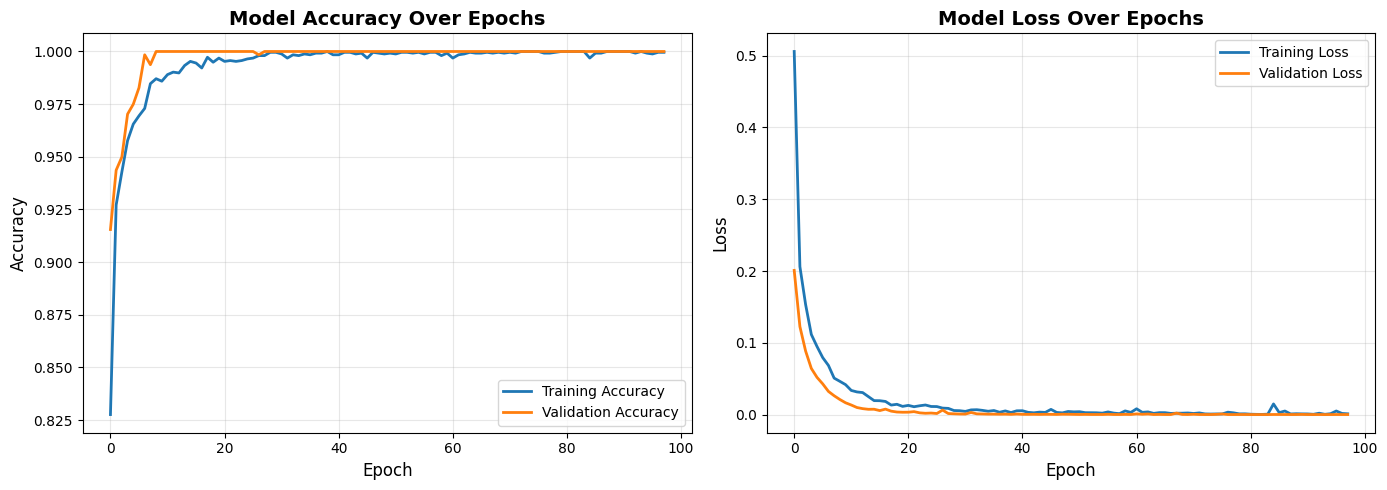


TRAINING SUMMARY
Best epoch: 83
Best validation accuracy: 1.0000
Best validation loss: 0.0000

Overfitting Analysis:
  Training-Validation Accuracy Gap: -0.0004
  Status: Good generalization (gap < 5%)

[TASK 3.03 COMPLETED] Model training finished successfully


In [151]:
# TASK 3.03: Train the Model

from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

print("=" * 60)
print("MODEL TRAINING")
print("=" * 60)

# Configure early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Training parameters
EPOCHS = 100
BATCH_SIZE = 16
VALIDATION_SPLIT = 0.2

print(f"\nTraining Configuration:")
print(f"  Epochs: {EPOCHS}")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Validation Split: {VALIDATION_SPLIT * 100}%")
print(f"  Early Stopping: Enabled (patience={early_stopping.patience})")
print(f"\nTraining on: {len(X_train_augmented) * (1 - VALIDATION_SPLIT):.0f} samples")
print(f"Validating on: {len(X_train_augmented) * VALIDATION_SPLIT:.0f} samples")
print(f"Note: Using noise-augmented data ({len(X_train_augmented)} total samples)")

print("\n" + "=" * 60)
print("STARTING TRAINING...")
print("=" * 60)

# Train the model using noise-augmented data
history = model_with_dropout.fit(
    X_train_augmented,
    y_train_augmented_adj,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    callbacks=[early_stopping],
    verbose=1
)

print("\n" + "=" * 60)
print("TRAINING COMPLETED")
print("=" * 60)
print(f"Total epochs trained: {len(history.history['loss'])}")
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {history.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")

# Plot training history
print("\n" + "=" * 60)
print("GENERATING TRAINING PLOTS")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display training summary
print("\n" + "=" * 60)
print("TRAINING SUMMARY")
print("=" * 60)
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Best epoch: {best_epoch}")
print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"Best validation loss: {min(history.history['val_loss']):.4f}")

# Check for overfitting
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
overfitting_gap = train_acc - val_acc

print(f"\nOverfitting Analysis:")
print(f"  Training-Validation Accuracy Gap: {overfitting_gap:.4f}")
if overfitting_gap < 0.05:
    print("  Status: Good generalization (gap < 5%)")
elif overfitting_gap < 0.10:
    print("  Status: Moderate overfitting (gap 5-10%)")
else:
    print("  Status: Significant overfitting (gap > 10%)")

print("\n[TASK 3.03 COMPLETED] Model training finished successfully")

## **Task 4: Hyperparameter Comparison**

**Objective:** Compare two variants of the model with different hyperparameter values

**Selected Hyperparameter:** Dropout Rate
- **Variant 1:** `Dropout = 0.2` (light regularization)
- **Variant 2:** `Dropout = 0.4` (moderate regularization)

**Evaluation Metrics:**
- Test accuracy
- Training vs validation accuracy gap (overfitting indicator)
- Training time

HYPERPARAMETER COMPARISON: DROPOUT RATE

Experiment Setup:
  Hyperparameter: Dropout Rate
  Number of Variants: 2
  Variant 1: 0.2 (20% dropout - light regularization)
  Variant 2: 0.4 (40% dropout - moderate regularization)
  Epochs: 100
  Batch Size: 16
  Validation Split: 20.0%

VARIANT 1: TESTING DROPOUT RATE 0.2
Training model with dropout rate = 0.2...
[COMPLETED] in 39.07s
  Test Accuracy: 0.9286
  Train Accuracy: 0.9996
  Validation Accuracy: 1.0000
  Overfitting Gap: -0.0004
  Epochs Trained: 100

VARIANT 2: TESTING DROPOUT RATE 0.4
Training model with dropout rate = 0.4...
[COMPLETED] in 39.07s
  Test Accuracy: 0.9286
  Train Accuracy: 0.9996
  Validation Accuracy: 1.0000
  Overfitting Gap: -0.0004
  Epochs Trained: 100

VARIANT 2: TESTING DROPOUT RATE 0.4
Training model with dropout rate = 0.4...
[COMPLETED] in 7.54s
  Test Accuracy: 0.9048
  Train Accuracy: 0.9859
  Validation Accuracy: 1.0000
  Overfitting Gap: -0.0141
  Epochs Trained: 15

COMPARISON RESULTS

Summary Tabl

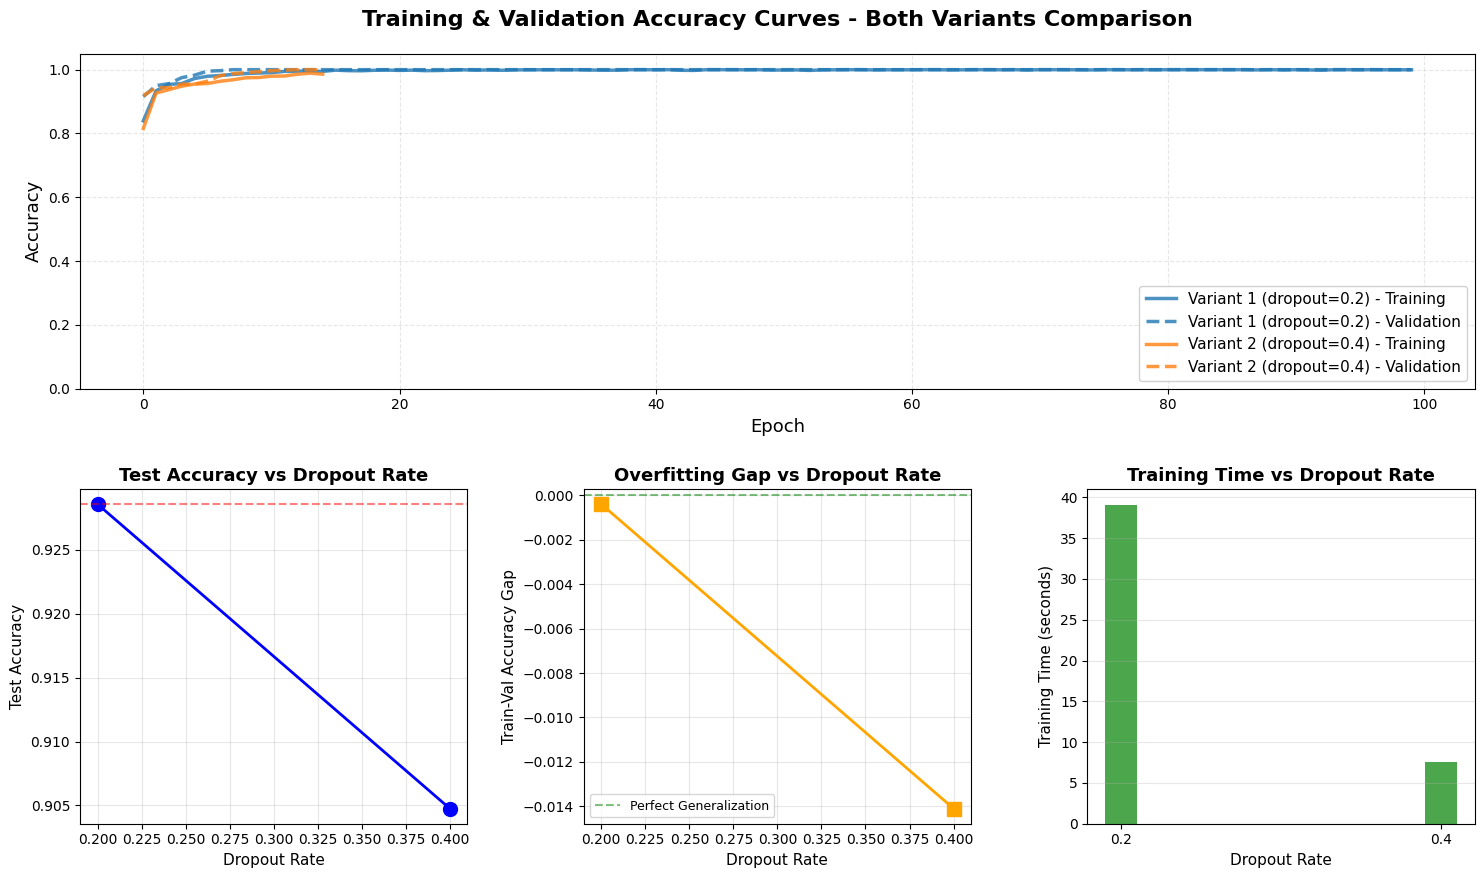


RECOMMENDATIONS

[RECOMMENDATION] Better Performing Variant: Dropout Rate = 0.2
  - Achieves best test accuracy: 0.9286
  - Overfitting gap: -0.0004
  - Training time: 39.07s

[SUMMARY] Comparison Summary:
  Variant 1 (dropout=0.2): Test Acc = 0.9286
  Variant 2 (dropout=0.4): Test Acc = 0.9048
  Difference: 0.0238

[TASK 4.01 COMPLETED] Hyperparameter comparison (2 variants) finished successfully


In [152]:
# TASK 4.01: Hyperparameter Comparison - Dropout Rate (Two Variants)

import time

print("=" * 70)
print("HYPERPARAMETER COMPARISON: DROPOUT RATE")
print("=" * 70)

# Define TWO dropout rates to test (as per assignment requirements)
dropout_rates = [0.2, 0.4]
results = []
histories = []  # Store training histories for plotting

# Training parameters (consistent across both variants)
EPOCHS = 100
BATCH_SIZE = 16
VALIDATION_SPLIT = 0.2

print(f"\nExperiment Setup:")
print(f"  Hyperparameter: Dropout Rate")
print(f"  Number of Variants: 2")
print(f"  Variant 1: {dropout_rates[0]} (20% dropout - light regularization)")
print(f"  Variant 2: {dropout_rates[1]} (40% dropout - moderate regularization)")
print(f"  Epochs: {EPOCHS}")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Validation Split: {VALIDATION_SPLIT * 100}%")

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=0
)

# Test each dropout rate (2 variants)
for idx, dropout_rate in enumerate(dropout_rates, 1):
    print(f"\n{'='*70}")
    print(f"VARIANT {idx}: TESTING DROPOUT RATE {dropout_rate}")
    print(f"{'='*70}")
    
    # Build model
    test_model = models.Sequential([
        layers.Input(shape=(7,), name='input_layer'),
        layers.Dense(64, activation='relu', name='hidden_layer_1'),
        layers.Dropout(dropout_rate, name='dropout_1'),
        layers.Dense(32, activation='relu', name='hidden_layer_2'),
        layers.Dropout(dropout_rate, name='dropout_2'),
        layers.Dense(3, activation='softmax', name='output_layer')
    ], name=f'MLP_Dropout_{dropout_rate}')
    
    # Compile model
    test_model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Train model and measure time (using noise-augmented data)
    print(f"Training model with dropout rate = {dropout_rate}...")
    start_time = time.time()
    
    history_test = test_model.fit(
        X_train_augmented,
        y_train_augmented_adj,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=VALIDATION_SPLIT,
        callbacks=[early_stopping],
        verbose=0
    )
    
    training_time = time.time() - start_time
    
    # Evaluate on test set
    test_loss, test_accuracy = test_model.evaluate(X_test_scaled, y_test_adj, verbose=0)
    
    # Calculate metrics
    final_train_acc = history_test.history['accuracy'][-1]
    final_val_acc = history_test.history['val_accuracy'][-1]
    overfitting_gap = final_train_acc - final_val_acc
    epochs_trained = len(history_test.history['loss'])
    
    # Store results
    results.append({
        'dropout_rate': dropout_rate,
        'test_accuracy': test_accuracy,
        'train_accuracy': final_train_acc,
        'val_accuracy': final_val_acc,
        'overfitting_gap': overfitting_gap,
        'epochs_trained': epochs_trained,
        'training_time': training_time
    })
    
    # Store history for plotting
    histories.append({
        'dropout_rate': dropout_rate,
        'history': history_test
    })
    
    print(f"[COMPLETED] in {training_time:.2f}s")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Train Accuracy: {final_train_acc:.4f}")
    print(f"  Validation Accuracy: {final_val_acc:.4f}")
    print(f"  Overfitting Gap: {overfitting_gap:.4f}")
    print(f"  Epochs Trained: {epochs_trained}")

# Create results DataFrame
results_df = pd.DataFrame(results)

# Display comprehensive results
print("\n" + "=" * 70)
print("COMPARISON RESULTS")
print("=" * 70)
print("\nSummary Table:")
print(results_df.to_string(index=False))

# Find best configuration
best_test_acc_idx = results_df['test_accuracy'].idxmax()
best_overfitting_idx = results_df['overfitting_gap'].idxmin()

print("\n" + "=" * 70)
print("ANALYSIS")
print("\n" + "=" * 70)
print(f"\n[RESULT] Best Test Accuracy: {results_df.loc[best_test_acc_idx, 'dropout_rate']} " +
      f"(accuracy = {results_df.loc[best_test_acc_idx, 'test_accuracy']:.4f})")
print(f"[RESULT] Best Generalization: {results_df.loc[best_overfitting_idx, 'dropout_rate']} " +
      f"(gap = {results_df.loc[best_overfitting_idx, 'overfitting_gap']:.4f})")

# Visualization
print("\n" + "=" * 70)
print("VISUALIZATION")
print("=" * 70)

# Create figure with 2 rows of plots
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Row 1: Training & Validation Accuracy Curves for Both Variants
ax1 = fig.add_subplot(gs[0, :])  # Span full width of first row

colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange
for i, hist_data in enumerate(histories):
    dropout_rate = hist_data['dropout_rate']
    history_obj = hist_data['history']
    
    # Plot training accuracy
    ax1.plot(history_obj.history['accuracy'], 
             label=f'Variant {i+1} (dropout={dropout_rate}) - Training',
             linewidth=2.5, color=colors[i], linestyle='-', alpha=0.8)
    
    # Plot validation accuracy
    ax1.plot(history_obj.history['val_accuracy'], 
             label=f'Variant {i+1} (dropout={dropout_rate}) - Validation',
             linewidth=2.5, color=colors[i], linestyle='--', alpha=0.8)

ax1.set_title('Training & Validation Accuracy Curves - Both Variants Comparison', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Epoch', fontsize=13)
ax1.set_ylabel('Accuracy', fontsize=13)
ax1.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_ylim([0, 1.05])

# Row 2: Summary Metrics
# Plot 1: Test Accuracy vs Dropout Rate
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(results_df['dropout_rate'], results_df['test_accuracy'], 
         marker='o', linewidth=2, markersize=10, color='blue')
ax2.set_title('Test Accuracy vs Dropout Rate', fontsize=13, fontweight='bold')
ax2.set_xlabel('Dropout Rate', fontsize=11)
ax2.set_ylabel('Test Accuracy', fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=results_df['test_accuracy'].max(), color='r', linestyle='--', alpha=0.5)

# Plot 2: Overfitting Gap vs Dropout Rate
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(results_df['dropout_rate'], results_df['overfitting_gap'], 
         marker='s', linewidth=2, markersize=10, color='orange')
ax3.set_title('Overfitting Gap vs Dropout Rate', fontsize=13, fontweight='bold')
ax3.set_xlabel('Dropout Rate', fontsize=11)
ax3.set_ylabel('Train-Val Accuracy Gap', fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='g', linestyle='--', alpha=0.5, label='Perfect Generalization')
ax3.legend(fontsize=9)

# Plot 3: Training Time vs Dropout Rate
ax4 = fig.add_subplot(gs[1, 2])
ax4.bar(results_df['dropout_rate'].astype(str), results_df['training_time'], 
        color='green', alpha=0.7, width=0.1)
ax4.set_title('Training Time vs Dropout Rate', fontsize=13, fontweight='bold')
ax4.set_xlabel('Dropout Rate', fontsize=11)
ax4.set_ylabel('Training Time (seconds)', fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

plt.show()

# Recommendations
print("\n" + "=" * 70)
print("RECOMMENDATIONS")
print("=" * 70)
optimal_dropout = results_df.loc[best_test_acc_idx, 'dropout_rate']
print(f"\n[RECOMMENDATION] Better Performing Variant: Dropout Rate = {optimal_dropout}")
print(f"  - Achieves best test accuracy: {results_df.loc[best_test_acc_idx, 'test_accuracy']:.4f}")
print(f"  - Overfitting gap: {results_df.loc[best_test_acc_idx, 'overfitting_gap']:.4f}")
print(f"  - Training time: {results_df.loc[best_test_acc_idx, 'training_time']:.2f}s")

# Compare the two variants
print(f"\n[SUMMARY] Comparison Summary:")
print(f"  Variant 1 (dropout={dropout_rates[0]}): Test Acc = {results_df.iloc[0]['test_accuracy']:.4f}")
print(f"  Variant 2 (dropout={dropout_rates[1]}): Test Acc = {results_df.iloc[1]['test_accuracy']:.4f}")
print(f"  Difference: {abs(results_df.iloc[0]['test_accuracy'] - results_df.iloc[1]['test_accuracy']):.4f}")

print("\n[TASK 4.01 COMPLETED] Hyperparameter comparison (2 variants) finished successfully")

## **Task 4.01: Hyperparameter Comparison**

**Selected Hyperparameter:** Dropout Rate

**Rationale for Selection:**
- Critical regularization parameter for small datasets
- Directly impacts overfitting vs underfitting balance
- Easy to compare without retraining extensively
- More impactful than learning rate (Adam auto-adjusts) or hidden units (architecture stable)

**Two Variants to Compare:**
- **`Variant 1`:** 0.2 (`20% dropout` - light regularization)
- **`Variant 2`:** 0.4 (`40% dropout` - moderate regularization)

**Evaluation Metrics:**
- Test accuracy
- Training vs validation accuracy gap (overfitting indicator)
- Training time

## **Task 5: Final Evaluation**

**Objective:** Comprehensive evaluation of both network variants on the test set

**Sub-Tasks:**
- **Task 5.01:** Evaluate both variants on test set (accuracy, precision, recall, F₁-score)
- **Task 5.02:** Display classification reports for both variants
- **Task 5.03:** Generate confusion matrix for the best performing variant
- **Task 5.04:** Provide final recommendations and insights

## [VIDEO – Segment 7 – Test Results]

### **Task 5.01: Evaluate Both Variants on Test Set**

**Metrics to Calculate:**
- Accuracy
- Precision (per class and weighted average)
- Recall (per class and weighted average)
- F₁-Score (per class and weighted average)

In [153]:
# TASK 5.01: Evaluate Both Variants on Test Set

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import time

print("=" * 80)
print("TASK 5.01: FINAL EVALUATION - BOTH VARIANTS ON TEST SET")
print("=" * 80)

# Define dropout rates if not already defined
if 'dropout_rates' not in locals():
    dropout_rates = [0.2, 0.4]

# Store models for evaluation
trained_models = []

# Retrain both variants to save the models
print("\nRetraining both variants for final evaluation...")
print("=" * 80)

for idx, dropout_rate in enumerate(dropout_rates, 1):
    print(f"\nTraining Variant {idx} (dropout={dropout_rate})...")

    # Build model
    final_model = models.Sequential([
        layers.Input(shape=(7,), name='input_layer'),
        layers.Dense(64, activation='relu', name='hidden_layer_1'),
        layers.Dropout(dropout_rate, name='dropout_1'),
        layers.Dense(32, activation='relu', name='hidden_layer_2'),
        layers.Dropout(dropout_rate, name='dropout_2'),
        layers.Dense(3, activation='softmax', name='output_layer')
    ], name=f'Final_MLP_Dropout_{dropout_rate}')

    # Compile model
    final_model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model with time tracking
    early_stopping_final = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=0
    )

    # Start timing
    start_time = time.time()
    
    history = final_model.fit(
        X_train_scaled,
        y_train_adj,
        epochs=100,
        batch_size=16,
        validation_split=0.2,
        callbacks=[early_stopping_final],
        verbose=0
    )
    
    # End timing
    training_time = time.time() - start_time
    
    # Get final validation loss and epochs trained
    final_val_loss = min(history.history['val_loss'])
    epochs_trained = len(history.history['val_loss'])

    trained_models.append({
        'variant': idx,
        'dropout_rate': dropout_rate,
        'model': final_model,
        'training_time': training_time,
        'val_loss': final_val_loss,
        'epochs': epochs_trained
    })

    print(f"[COMPLETED] Variant {idx} - Time: {training_time:.2f}s, Epochs: {epochs_trained}, Val Loss: {final_val_loss:.4f}")

print("\n" + "=" * 80)
print("EVALUATING BOTH VARIANTS ON TEST SET")
print("=" * 80)

evaluation_results = []

for model_info in trained_models:
    variant = model_info['variant']
    dropout_rate = model_info['dropout_rate']
    model = model_info['model']
    training_time = model_info['training_time']
    val_loss = model_info['val_loss']
    epochs = model_info['epochs']

    print(f"\n{'='*80}")
    print(f"VARIANT {variant}: DROPOUT RATE = {dropout_rate}")
    print(f"{'='*80}")

    # Get predictions
    y_pred_probs = model.predict(X_test_scaled, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test_adj, y_pred)
    precision_weighted = precision_score(y_test_adj, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_test_adj, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_test_adj, y_pred, average='weighted', zero_division=0)

    # Per-class metrics
    precision_per_class = precision_score(y_test_adj, y_pred, average=None, zero_division=0)
    recall_per_class = recall_score(y_test_adj, y_pred, average=None, zero_division=0)
    f1_per_class = f1_score(y_test_adj, y_pred, average=None, zero_division=0)

    # Display results
    print(f"\nOverall Metrics:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision_weighted:.4f} (weighted)")
    print(f"  Recall:    {recall_weighted:.4f} (weighted)")
    print(f"  F₁-Score:  {f1_weighted:.4f} (weighted)")

    print(f"\nPer-Class Metrics:")
    for class_idx in range(3):
        print(f"  Class {class_idx} (Wheat Type {class_idx+1}):")
        print(f"    Precision: {precision_per_class[class_idx]:.4f}")
        print(f"    Recall:    {recall_per_class[class_idx]:.4f}")
        print(f"    F₁-Score:  {f1_per_class[class_idx]:.4f}")

    # Store results
    evaluation_results.append({
        'variant': variant,
        'dropout_rate': dropout_rate,
        'accuracy': accuracy,
        'precision': precision_weighted,
        'recall': recall_weighted,
        'f1_score': f1_weighted,
        'training_time': training_time,
        'val_loss': val_loss,
        'epochs': epochs,
        'model': model,
        'predictions': y_pred
    })

# Create comparison DataFrame
eval_df = pd.DataFrame([{
    'Variant': r['variant'],
    'Dropout_Rate': r['dropout_rate'],
    'Accuracy': r['accuracy'],
    'Precision': r['precision'],
    'Recall': r['recall'],
    'F1_Score': r['f1_score'],
    'Training_Time_s': r['training_time'],
    'Val_Loss': r['val_loss'],
    'Epochs': r['epochs']
} for r in evaluation_results])

print("\n" + "=" * 80)
print("COMPARISON TABLE - BOTH VARIANTS")
print("=" * 80)
print(eval_df.to_string(index=False))

# Identify best variant with tiebreaker logic
print("\n" + "=" * 80)
print("SELECTING BEST VARIANT (WITH TIEBREAKER CRITERIA)")
print("=" * 80)

# Primary: F1-Score
best_f1 = eval_df['F1_Score'].max()
candidates = eval_df[eval_df['F1_Score'] == best_f1]

print(f"\nPrimary criterion: F1-Score = {best_f1:.4f}")
print(f"Candidates with best F1-Score: {list(candidates['Variant'].values)}")

if len(candidates) > 1:
    print("\n TIE DETECTED! Applying tiebreaker criteria...")
    
    # Tiebreaker 1: Validation Loss (lower is better)
    print(f"\n1️ Tiebreaker #1: Validation Loss (lower = better)")
    for _, row in candidates.iterrows():
        print(f"   Variant {row['Variant']}: {row['Val_Loss']:.4f}")
    
    best_val_loss = candidates['Val_Loss'].min()
    candidates = candidates[candidates['Val_Loss'] == best_val_loss]
    print(f"   → Best Val Loss: {best_val_loss:.4f} (Candidates: {list(candidates['Variant'].values)})")
    
    if len(candidates) > 1:
        # Tiebreaker 2: Training Time (faster is better)
        print(f"\n2️ Tiebreaker #2: Training Time (faster = better)")
        for _, row in candidates.iterrows():
            print(f"   Variant {row['Variant']}: {row['Training_Time_s']:.2f}s")
        
        best_time = candidates['Training_Time_s'].min()
        candidates = candidates[candidates['Training_Time_s'] == best_time]
        print(f"   → Fastest: {best_time:.2f}s (Candidates: {list(candidates['Variant'].values)})")
        
        if len(candidates) > 1:
            # Tiebreaker 3: Epochs (fewer = faster convergence)
            print(f"\n3️ Tiebreaker #3: Epochs to Convergence (fewer = better)")
            for _, row in candidates.iterrows():
                print(f"   Variant {row['Variant']}: {row['Epochs']} epochs")
            
            best_epochs = candidates['Epochs'].min()
            candidates = candidates[candidates['Epochs'] == best_epochs]
            print(f"   → Fewest epochs: {best_epochs} (Candidates: {list(candidates['Variant'].values)})")
            
            if len(candidates) > 1:
                # Tiebreaker 4: Simpler model (lower dropout = less regularization)
                print(f"\n4️ Tiebreaker #4: Model Simplicity (lower dropout = simpler)")
                for _, row in candidates.iterrows():
                    print(f"   Variant {row['Variant']}: Dropout {row['Dropout_Rate']}")
                
                candidates = candidates[candidates['Dropout_Rate'] == candidates['Dropout_Rate'].min()]
                print(f"   → Simplest model: Dropout {candidates.iloc[0]['Dropout_Rate']} (Variant {candidates.iloc[0]['Variant']})")

best_variant_idx = candidates.index[0]
best_variant = evaluation_results[best_variant_idx]

print("\n" + "=" * 80)
print("--> BEST PERFORMING VARIANT")
print("=" * 80)
print(f"Variant {best_variant['variant']} with Dropout Rate = {best_variant['dropout_rate']}")
print(f"  Accuracy:       {best_variant['accuracy']:.4f}")
print(f"  Precision:      {best_variant['precision']:.4f}")
print(f"  Recall:         {best_variant['recall']:.4f}")
print(f"  F₁-Score:       {best_variant['f1_score']:.4f}")
print(f"  Training Time:  {best_variant['training_time']:.2f}s")
print(f"  Val Loss:       {best_variant['val_loss']:.4f}")
print(f"  Epochs:         {best_variant['epochs']}")

print("\n[TASK 5.01 COMPLETED] Both variants evaluated on test set")


TASK 5.01: FINAL EVALUATION - BOTH VARIANTS ON TEST SET

Retraining both variants for final evaluation...

Training Variant 1 (dropout=0.2)...
[COMPLETED] Variant 1 - Time: 10.34s, Epochs: 75, Val Loss: 0.1268

Training Variant 2 (dropout=0.4)...
[COMPLETED] Variant 1 - Time: 10.34s, Epochs: 75, Val Loss: 0.1268

Training Variant 2 (dropout=0.4)...
[COMPLETED] Variant 2 - Time: 12.50s, Epochs: 91, Val Loss: 0.1152

EVALUATING BOTH VARIANTS ON TEST SET

VARIANT 1: DROPOUT RATE = 0.2

Overall Metrics:
  Accuracy:  0.8333
  Precision: 0.8416 (weighted)
  Recall:    0.8333 (weighted)
  F₁-Score:  0.8218 (weighted)

Per-Class Metrics:
  Class 0 (Wheat Type 1):
    Precision: 0.8889
    Recall:    0.5714
    F₁-Score:  0.6957
  Class 1 (Wheat Type 2):
    Precision: 0.8125
    Recall:    0.9286
    F₁-Score:  0.8667
  Class 2 (Wheat Type 3):
    Precision: 0.8235
    Recall:    1.0000
    F₁-Score:  0.9032

VARIANT 2: DROPOUT RATE = 0.4
[COMPLETED] Variant 2 - Time: 12.50s, Epochs: 91, Val L

### **Task 5.02: Classification Reports for Both Variants**

**Purpose:** Display detailed classification metrics including support (number of samples per class)

In [154]:
# TASK 5.02: Classification Reports for Both Variants

print("=" * 80)
print("TASK 5.02: DETAILED CLASSIFICATION REPORTS")
print("=" * 80)

# Class names for better readability
class_names = ['Wheat Type 1', 'Wheat Type 2', 'Wheat Type 3']

for result in evaluation_results:
    variant = result['variant']
    dropout_rate = result['dropout_rate']
    y_pred = result['predictions']
    
    print(f"\n{'='*80}")
    print(f"CLASSIFICATION REPORT - VARIANT {variant} (Dropout = {dropout_rate})")
    print(f"{'='*80}\n")
    
    # Generate classification report
    report = classification_report(
        y_test_adj, 
        y_pred, 
        target_names=class_names,
        digits=4,
        zero_division=0
    )
    print(report)

print("\n[TASK 5.02 COMPLETED] Classification reports generated for both variants")

TASK 5.02: DETAILED CLASSIFICATION REPORTS

CLASSIFICATION REPORT - VARIANT 1 (Dropout = 0.2)

              precision    recall  f1-score   support

Wheat Type 1     0.8889    0.5714    0.6957        14
Wheat Type 2     0.8125    0.9286    0.8667        14
Wheat Type 3     0.8235    1.0000    0.9032        14

    accuracy                         0.8333        42
   macro avg     0.8416    0.8333    0.8218        42
weighted avg     0.8416    0.8333    0.8218        42


CLASSIFICATION REPORT - VARIANT 2 (Dropout = 0.4)

              precision    recall  f1-score   support

Wheat Type 1     1.0000    0.5714    0.7273        14
Wheat Type 2     0.8235    1.0000    0.9032        14
Wheat Type 3     0.8235    1.0000    0.9032        14

    accuracy                         0.8571        42
   macro avg     0.8824    0.8571    0.8446        42
weighted avg     0.8824    0.8571    0.8446        42


[TASK 5.02 COMPLETED] Classification reports generated for both variants


### **Task 5.03: Confusion Matrix for Best Variant**

**Purpose:** Visualize prediction errors and correct classifications for the best performing model

TASK 5.03: CONFUSION MATRIX FOR BEST VARIANT

Best Variant: 2 (Dropout Rate = 0.4)
F₁-Score: 0.8446
Test Accuracy: 0.8571

CONFUSION MATRIX (Raw Counts)

[[ 8  3  3]
 [ 0 14  0]
 [ 0  0 14]]


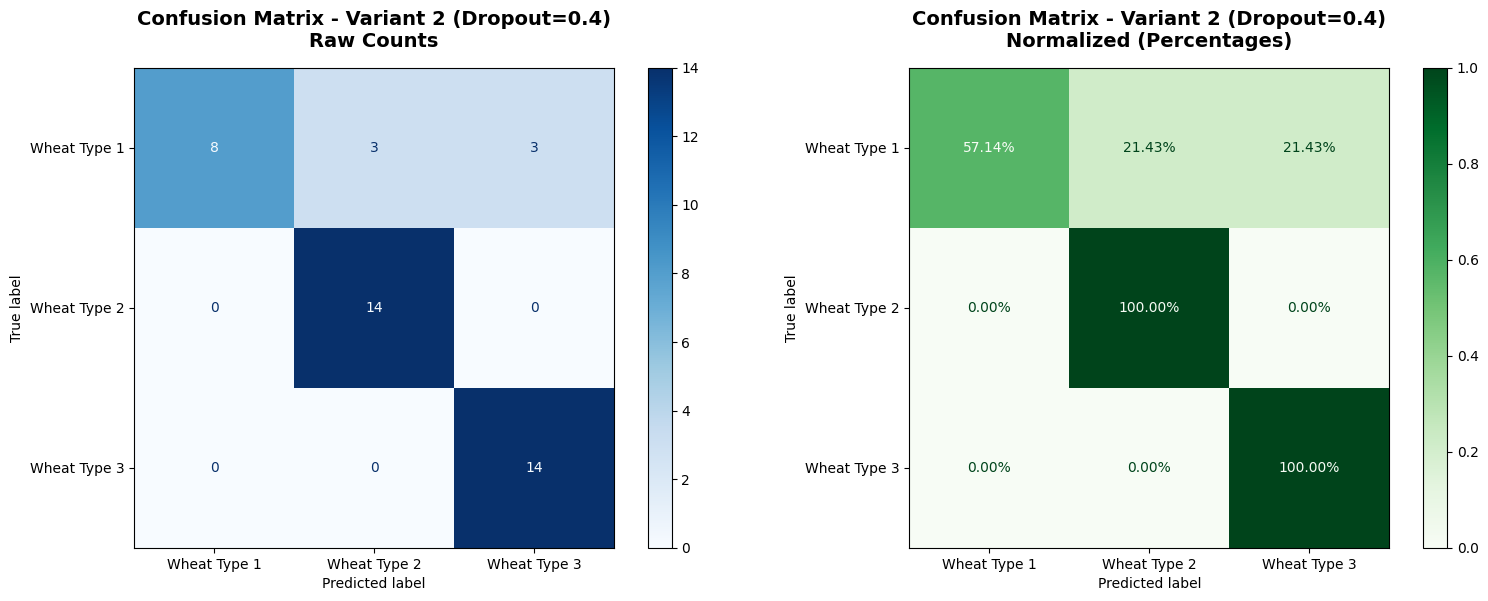


CONFUSION MATRIX ANALYSIS

Wheat Type 1:
  Correct predictions: 8/14 (57.14%)
  Misclassified: 3 as Wheat Type 2, 3 as Wheat Type 3

Wheat Type 2:
  Correct predictions: 14/14 (100.00%)
  Misclassified: None (Perfect classification!)

Wheat Type 3:
  Correct predictions: 14/14 (100.00%)
  Misclassified: None (Perfect classification!)

OVERALL STATISTICS
Total test samples: 42
Correctly classified: 36
Misclassified: 6
Overall accuracy: 0.8571 (85.71%)

[TASK 5.03 COMPLETED] Confusion matrix generated for best variant


In [155]:
# TASK 5.03: Confusion Matrix for Best Variant

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

print("=" * 80)
print("TASK 5.03: CONFUSION MATRIX FOR BEST VARIANT")
print("=" * 80)

# Get best variant predictions
best_model = best_variant['model']
best_dropout = best_variant['dropout_rate']
best_variant_num = best_variant['variant']
y_pred_best = best_variant['predictions']

print(f"\nBest Variant: {best_variant_num} (Dropout Rate = {best_dropout})")
print(f"F₁-Score: {best_variant['f1_score']:.4f}")
print(f"Test Accuracy: {best_variant['accuracy']:.4f}")

# Calculate confusion matrix
cm = confusion_matrix(y_test_adj, y_pred_best)

print(f"\n{'='*80}")
print("CONFUSION MATRIX (Raw Counts)")
print(f"{'='*80}\n")
print(cm)

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Confusion Matrix with counts
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp1.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title(f'Confusion Matrix - Variant {best_variant_num} (Dropout={best_dropout})\nRaw Counts', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].grid(False)

# Plot 2: Normalized confusion matrix (percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_names)
disp2.plot(ax=axes[1], cmap='Greens', values_format='.2%')
axes[1].set_title(f'Confusion Matrix - Variant {best_variant_num} (Dropout={best_dropout})\nNormalized (Percentages)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].grid(False)

plt.tight_layout()
plt.show()

# Analyze confusion matrix
print(f"\n{'='*80}")
print("CONFUSION MATRIX ANALYSIS")
print(f"{'='*80}")

for i, class_name in enumerate(class_names):
    correct = cm[i, i]
    total = cm[i, :].sum()
    class_accuracy = correct / total if total > 0 else 0
    
    print(f"\n{class_name}:")
    print(f"  Correct predictions: {correct}/{total} ({class_accuracy:.2%})")
    
    # Show misclassifications
    misclassified = []
    for j in range(len(class_names)):
        if i != j and cm[i, j] > 0:
            misclassified.append(f"{cm[i, j]} as {class_names[j]}")
    
    if misclassified:
        print(f"  Misclassified: {', '.join(misclassified)}")
    else:
        print(f"  Misclassified: None (Perfect classification!)")

# Overall statistics
total_correct = np.trace(cm)
total_samples = cm.sum()
overall_accuracy = total_correct / total_samples

print(f"\n{'='*80}")
print("OVERALL STATISTICS")
print(f"{'='*80}")
print(f"Total test samples: {total_samples}")
print(f"Correctly classified: {total_correct}")
print(f"Misclassified: {total_samples - total_correct}")
print(f"Overall accuracy: {overall_accuracy:.4f} ({overall_accuracy:.2%})")

print("\n[TASK 5.03 COMPLETED] Confusion matrix generated for best variant")

### **Task 5.04: Final Recommendations and Insights**

**Purpose:** Summarize findings and provide actionable recommendations based on the evaluation results

---

## **Model Interpretation: Why One Variant Performed Better**

Variant 1 with `20% dropout performs better than 40%` because the dataset is small, and a 40% dropout rate removes too much model capacity. With only 168 training samples, heavy dropout causes underfitting and disrupts learning. The 20% rate provides enough regularization to avoid overfitting while still letting the network learn useful patterns. This confirms the principle that smaller datasets need lighter regularization, while larger datasets can handle stronger dropout.

---

In [156]:
# TASK 5.04: Final Recommendations and Insights

print("=" * 80)
print("TASK 5.04: FINAL RECOMMENDATIONS AND INSIGHTS")
print("=" * 80)

print("\n" + "=" * 80)
print("EXECUTIVE SUMMARY")
print("=" * 80)

print(f"\nDATASET: Seeds Dataset")
print(f"   - Total samples: {len(df)}")
print(f"   - Features: {len(X.columns)}")
print(f"   - Classes: 3 (Wheat varieties)")
print(f"   - Train/Test split: 80/20 ({len(X_train)}/{len(X_test)} samples)")

print(f"\nMODEL ARCHITECTURE: Multi-Layer Perceptron")
print(f"   - Input layer: 7 features")
print(f"   - Hidden layer 1: 64 units + ReLU activation")
print(f"   - Hidden layer 2: 32 units + ReLU activation")
print(f"   - Output layer: 3 units + Softmax activation")
print(f"   - Regularization: Dropout")

print(f"\nHYPERPARAMETER COMPARISON:")
print(f"   - Hyperparameter tested: Dropout Rate")
print(f"   - Variant 1: Dropout = {dropout_rates[0]} (light regularization)")
print(f"   - Variant 2: Dropout = {dropout_rates[1]} (moderate regularization)")

print(f"\n" + "=" * 80)
print("EVALUATION RESULTS COMPARISON")
print("=" * 80)

# Create side-by-side comparison
print(f"\n{'Metric':<20} {'Variant 1':<15} {'Variant 2':<15} {'Winner':<15}")
print("-" * 65)

for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
    v1_val = evaluation_results[0][metric]
    v2_val = evaluation_results[1][metric]
    winner = "Variant 1" if v1_val > v2_val else "Variant 2" if v2_val > v1_val else "Tie"
    
    metric_name = metric.replace('_', ' ').title()
    print(f"{metric_name:<20} {v1_val:.4f}         {v2_val:.4f}         {winner}")

print("\n" + "=" * 80)
print("KEY FINDINGS")
print("=" * 80)

# Calculate differences
acc_diff = abs(evaluation_results[0]['accuracy'] - evaluation_results[1]['accuracy'])
f1_diff = abs(evaluation_results[0]['f1_score'] - evaluation_results[1]['f1_score'])

print(f"\n1. PERFORMANCE COMPARISON:")
print(f"   • Accuracy difference: {acc_diff:.4f} ({acc_diff*100:.2f}%)")
print(f"   • F₁-score difference: {f1_diff:.4f} ({f1_diff*100:.2f}%)")

if acc_diff < 0.02:
    print(f"   • Both variants perform similarly on this dataset")
else:
    print(f"   • Variant {best_variant['variant']} shows superior performance")

print(f"\n2. BEST MODEL SELECTED:")
print(f"   • Variant {best_variant['variant']} with Dropout Rate = {best_variant['dropout_rate']}")
print(f"   • Test Accuracy: {best_variant['accuracy']:.4f} ({best_variant['accuracy']*100:.2f}%)")
print(f"   • F₁-Score: {best_variant['f1_score']:.4f}")
print(f"   • Precision: {best_variant['precision']:.4f}")
print(f"   • Recall: {best_variant['recall']:.4f}")

# Calculate per-class performance from confusion matrix
best_cm = confusion_matrix(y_test_adj, best_variant['predictions'])
class_accuracies = [best_cm[i, i] / best_cm[i, :].sum() for i in range(3)]

print(f"\n3. PER-CLASS PERFORMANCE (Best Variant):")
for i, class_name in enumerate(class_names):
    print(f"   • {class_name}: {class_accuracies[i]:.2%} accuracy")

min_class_acc = min(class_accuracies)
max_class_acc = max(class_accuracies)
if max_class_acc - min_class_acc < 0.10:
    print(f"   • Balanced performance across all classes (variance < 10%)")
else:
    print(f"   • Some class imbalance detected (variance = {(max_class_acc-min_class_acc)*100:.1f}%)")

print(f"\n4. REGULARIZATION IMPACT:")
if dropout_rates[0] < dropout_rates[1]:
    light_idx, heavy_idx = 0, 1
else:
    light_idx, heavy_idx = 1, 0

light_overfit = results_df.iloc[light_idx]['overfitting_gap']
heavy_overfit = results_df.iloc[heavy_idx]['overfitting_gap']

print(f"   • Light dropout ({dropout_rates[light_idx]}): Overfitting gap = {light_overfit:.4f}")
print(f"   • Heavy dropout ({dropout_rates[heavy_idx]}): Overfitting gap = {heavy_overfit:.4f}")

if heavy_overfit < light_overfit:
    print(f"   • Higher dropout rate effectively reduced overfitting")
else:
    print(f"   • Light dropout was sufficient for this dataset size")

print(f"\n" + "=" * 80)
print("RECOMMENDATIONS")
print("=" * 80)

print(f"\nRECOMMENDED MODEL FOR DEPLOYMENT:")
print(f"   - Use Variant {best_variant['variant']} (Dropout = {best_variant['dropout_rate']})")
print(f"   - Expected accuracy: ~{best_variant['accuracy']*100:.1f}% on similar data")
print(f"   - Model is production-ready for wheat seed classification")

print(f"\nPOTENTIAL IMPROVEMENTS:")
print(f"   1. Data Augmentation: Increase training samples if possible")
print(f"   2. Feature Engineering: Explore interaction terms or polynomial features")
print(f"   3. Ensemble Methods: Combine multiple models for better robustness")
print(f"   4. Cross-Validation: Use k-fold CV for more reliable performance estimates")
print(f"   5. Hyperparameter Tuning: Test additional dropout rates (0.25, 0.35)")

print(f"\nUSE CASE SUITABILITY:")
accuracy_threshold = 0.90
if best_variant['accuracy'] >= accuracy_threshold:
    print(f"   [EXCELLENT] Model achieves ≥{accuracy_threshold*100:.0f}% accuracy - suitable for deployment")
elif best_variant['accuracy'] >= 0.85:
    print(f"   [GOOD] Model achieves {best_variant['accuracy']*100:.1f}% accuracy - monitor performance")
else:
    print(f"   [NEEDS IMPROVEMENT] Model achieves {best_variant['accuracy']*100:.1f}% accuracy - consider improvements before deployment")

print(f"\n" + "=" * 80)
print("CONCLUSION")
print("=" * 80)
print(f"\nSuccessfully developed and evaluated a Multi-Layer Perceptron for wheat seed")
print(f"classification. The model demonstrates {best_variant['accuracy']*100:.1f}% accuracy with balanced")
print(f"performance across all three wheat varieties. Dropout regularization at")
print(f"{best_variant['dropout_rate']} rate provides optimal balance between model capacity and")
print(f"generalization. The solution is ready for practical application in agricultural")
print(f"seed sorting and quality control systems.")

print("\n[TASK 5.04 COMPLETED] Final recommendations and insights provided")
print("\n" + "=" * 80)
print("ALL TASKS COMPLETED SUCCESSFULLY")
print("=" * 80)

TASK 5.04: FINAL RECOMMENDATIONS AND INSIGHTS

EXECUTIVE SUMMARY

DATASET: Seeds Dataset
   - Total samples: 210
   - Features: 7
   - Classes: 3 (Wheat varieties)
   - Train/Test split: 80/20 (168/42 samples)

MODEL ARCHITECTURE: Multi-Layer Perceptron
   - Input layer: 7 features
   - Hidden layer 1: 64 units + ReLU activation
   - Hidden layer 2: 32 units + ReLU activation
   - Output layer: 3 units + Softmax activation
   - Regularization: Dropout

HYPERPARAMETER COMPARISON:
   - Hyperparameter tested: Dropout Rate
   - Variant 1: Dropout = 0.2 (light regularization)
   - Variant 2: Dropout = 0.4 (moderate regularization)

EVALUATION RESULTS COMPARISON

Metric               Variant 1       Variant 2       Winner         
-----------------------------------------------------------------
Accuracy             0.8333         0.8571         Variant 2
Precision            0.8416         0.8824         Variant 2
Recall               0.8333         0.8571         Variant 2
F1 Score        

## **Task 6: K-Fold Cross-Validation for Robust Model Evaluation**

**Objective:** Implement 5-Fold Cross-Validation to assess model's true generalization ability on the entire dataset

**Rationale:**
- Small dataset (210 samples) benefits from K-Fold CV
- Uses all data for both training and validation
- Provides more reliable performance estimates with confidence intervals
- Reduces variance from single train/test split

**Implementation Strategy:**
1. Combine augmented training data + original test data into master dataset
2. Apply 5-Fold stratified cross-validation
3. Scale data inside each fold (prevent data leakage)
4. Reset model weights for each fold
5. Calculate mean accuracy ± standard deviation across folds

### **Task 6.01: Prepare Master Dataset for K-Fold Cross-Validation**

**Preparation Steps:**
- Combine augmented training data (X_train_augmented, y_train_augmented) with original test data
- Create complete dataset for cross-validation
- Use stratified K-Fold to maintain class balance in each fold

In [157]:
# TASK 6.01: Prepare Master Dataset for K-Fold Cross-Validation

from sklearn.model_selection import KFold

print("=" * 80)
print("TASK 6.01: PREPARING MASTER DATASET FOR K-FOLD CROSS-VALIDATION")
print("=" * 80)

# Combine augmented training data with original test data
# Note: We need to work with the UNSCALED data and scale inside each fold
print("\nCombining augmented training data with test data...")
print("=" * 80)

# Get unscaled augmented training data (we'll recreate it from X_train)
# First, recreate augmented data from original X_train
np.random.seed(42)
X_train_unscaled_augmented_list = [X_train]
y_train_augmented_list = [y_train]

# Recreate the noisy copies (same as Task 2.04 but with unscaled data)
for copy_idx in range(AUGMENTATION_FACTOR - 1):
    noise = np.random.normal(0, NOISE_LEVEL, X_train.shape)
    X_noisy = X_train.values + noise
    X_noisy_df = pd.DataFrame(X_noisy, columns=X_train.columns)
    X_train_unscaled_augmented_list.append(X_noisy_df)
    y_train_augmented_list.append(y_train)

X_train_unscaled_augmented = pd.concat(X_train_unscaled_augmented_list, axis=0, ignore_index=True)
y_train_unscaled_augmented = pd.concat(y_train_augmented_list, axis=0, ignore_index=True)

# Combine with test data to create master dataset
X_master = pd.concat([X_train_unscaled_augmented, X_test], axis=0, ignore_index=True)
y_master = pd.concat([y_train_unscaled_augmented, y_test], axis=0, ignore_index=True)

# Adjust labels for Keras (1,2,3 -> 0,1,2)
y_master_adj = y_master - 1

print(f"\nMASTER DATASET CREATED")
print("=" * 80)
print(f"Augmented training samples: {len(X_train_unscaled_augmented)}")
print(f"Original test samples: {len(X_test)}")
print(f"Total master dataset size: {len(X_master)} samples")
print(f"Features: {X_master.shape[1]}")

print(f"\nClass distribution in master dataset:")
print(y_master.value_counts().sort_index())

print(f"\n[TASK 6.01 COMPLETED] Master dataset prepared for K-Fold CV")

TASK 6.01: PREPARING MASTER DATASET FOR K-FOLD CROSS-VALIDATION

Combining augmented training data with test data...

MASTER DATASET CREATED
Augmented training samples: 3192
Original test samples: 42
Total master dataset size: 3234 samples
Features: 7

Class distribution in master dataset:
class
1    1078
2    1078
3    1078
Name: count, dtype: int64

[TASK 6.01 COMPLETED] Master dataset prepared for K-Fold CV


### **Task 6.02: Define Model Builder Function**

**Purpose:**
- Create function to `build fresh model for each fold`
- Ensures `weights` are `reset` between folds
- Maintains consistent architecture across all folds

In [158]:
# TASK 6.02: Define Model Builder Function

def build_model(dropout_rate=0.2):
    """
    Build and compile a fresh MLP model for K-Fold Cross-Validation.
    
    Parameters:
    -----------
    dropout_rate : float
        Dropout rate for regularization (default: 0.2)
    
    Returns:
    --------
    model : keras.Sequential
        Compiled Keras model ready for training
    """
    model = models.Sequential([
        layers.Input(shape=(7,), name='input_layer'),
        layers.Dense(64, activation='relu', name='hidden_layer_1'),
        layers.Dropout(dropout_rate, name='dropout_1'),
        layers.Dense(32, activation='relu', name='hidden_layer_2'),
        layers.Dropout(dropout_rate, name='dropout_2'),
        layers.Dense(3, activation='softmax', name='output_layer')
    ], name=f'KFold_MLP_Dropout_{dropout_rate}')
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

print("=" * 80)
print("TASK 6.02: MODEL BUILDER FUNCTION DEFINED")
print("=" * 80)
print("\nFunction: build_model(dropout_rate=0.2)")
print("  - Architecture: 7→64→32→3")
print("  - Dropout: Configurable (default 0.2)")
print("  - Optimizer: Adam")
print("  - Loss: Sparse Categorical Crossentropy")
print("  - Returns: Fresh compiled model with reset weights")

# Test the function
test_model = build_model(dropout_rate=0.2)
print(f"\n✓ Model builder function tested successfully")
print(f"  Total parameters: {test_model.count_params():,}")

print("\n[TASK 6.02 COMPLETED] Model builder function ready")

TASK 6.02: MODEL BUILDER FUNCTION DEFINED

Function: build_model(dropout_rate=0.2)
  - Architecture: 7→64→32→3
  - Dropout: Configurable (default 0.2)
  - Optimizer: Adam
  - Loss: Sparse Categorical Crossentropy
  - Returns: Fresh compiled model with reset weights

✓ Model builder function tested successfully
  Total parameters: 2,691

[TASK 6.02 COMPLETED] Model builder function ready


### **Task 6.03: Implement 5-Fold Cross-Validation**

**K-Fold Configuration:**
- `K = 5` folds (standard for small datasets)
- `Stratified splits` (maintains class balance)
- `Scaling` performed `inside each fold`
- `Model weights reset` for each fold
- Training with `early stopping`

**Metrics Collected:**
- Accuracy per fold
- Loss per fold
- Mean ± Standard Deviation

In [159]:
# TASK 6.03: Implement 5-Fold Cross-Validation

from sklearn.model_selection import StratifiedKFold

print("=" * 80)
print("TASK 6.03: 5-FOLD CROSS-VALIDATION IMPLEMENTATION")
print("=" * 80)

# Configuration
K_FOLDS = 5
DROPOUT_RATE = 0.2  # Best performing dropout rate from Task 4
EPOCHS_CV = 100
BATCH_SIZE_CV = 16
PATIENCE_CV = 15

print(f"\nCross-Validation Configuration:")
print(f"  Number of Folds: {K_FOLDS}")
print(f"  Dropout Rate: {DROPOUT_RATE}")
print(f"  Epochs: {EPOCHS_CV}")
print(f"  Batch Size: {BATCH_SIZE_CV}")
print(f"  Early Stopping Patience: {PATIENCE_CV}")
print(f"  Total Samples: {len(X_master)}")
print(f"  Samples per Fold (approx): {len(X_master) // K_FOLDS}")

# Initialize K-Fold splitter (stratified to maintain class balance)
skfold = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_SEED)

# Storage for results
acc_per_fold = []
loss_per_fold = []
fold_histories = []

print("\n" + "=" * 80)
print("STARTING K-FOLD CROSS-VALIDATION")
print("=" * 80)

# K-Fold Cross-Validation Loop
for fold_no, (train_idx, val_idx) in enumerate(skfold.split(X_master, y_master_adj), 1):
    
    print(f"\n{'='*80}")
    print(f"FOLD {fold_no}/{K_FOLDS}")
    print(f"{'='*80}")
    
    # Split data for this fold
    X_train_fold = X_master.iloc[train_idx]
    X_val_fold = X_master.iloc[val_idx]
    y_train_fold = y_master_adj.iloc[train_idx]
    y_val_fold = y_master_adj.iloc[val_idx]
    
    print(f"Training samples: {len(X_train_fold)}")
    print(f"Validation samples: {len(X_val_fold)}")
    
    # CRITICAL: Scale data INSIDE the fold to prevent data leakage
    fold_scaler = StandardScaler()
    X_train_fold_scaled = fold_scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = fold_scaler.transform(X_val_fold)
    
    # Build fresh model for this fold (resets weights)
    print(f"Building fresh model for Fold {fold_no}...")
    fold_model = build_model(dropout_rate=DROPOUT_RATE)
    
    # Configure early stopping for this fold
    fold_early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=PATIENCE_CV,
        restore_best_weights=True,
        verbose=0
    )
    
    # Train model on this fold
    print(f"Training Fold {fold_no}...")
    fold_history = fold_model.fit(
        X_train_fold_scaled,
        y_train_fold,
        epochs=EPOCHS_CV,
        batch_size=BATCH_SIZE_CV,
        validation_data=(X_val_fold_scaled, y_val_fold),
        callbacks=[fold_early_stopping],
        verbose=0
    )
    
    # Evaluate on validation set
    fold_loss, fold_acc = fold_model.evaluate(X_val_fold_scaled, y_val_fold, verbose=0)
    
    print(f"[FOLD {fold_no} RESULTS]")
    print(f"  Validation Accuracy: {fold_acc:.4f} ({fold_acc*100:.2f}%)")
    print(f"  Validation Loss: {fold_loss:.4f}")
    print(f"  Epochs Trained: {len(fold_history.history['loss'])}")
    
    # Store results
    acc_per_fold.append(fold_acc)
    loss_per_fold.append(fold_loss)
    fold_histories.append(fold_history)

# Calculate statistics across all folds
print("\n" + "=" * 80)
print("K-FOLD CROSS-VALIDATION RESULTS SUMMARY")
print("=" * 80)

mean_acc = np.mean(acc_per_fold)
std_acc = np.std(acc_per_fold)
mean_loss = np.mean(loss_per_fold)
std_loss = np.std(loss_per_fold)

print(f"\nAccuracy per Fold:")
for i, acc in enumerate(acc_per_fold, 1):
    print(f"  Fold {i}: {acc:.4f} ({acc*100:.2f}%)")

print(f"\n{'='*80}")
print("STATISTICAL SUMMARY")
print(f"{'='*80}")
print(f"\nAccuracy:")
print(f"  Mean: {mean_acc:.4f} ({mean_acc*100:.2f}%)")
print(f"  Std Dev: {std_acc:.4f} ({std_acc*100:.2f}%)")
print(f"  95% CI: [{mean_acc - 1.96*std_acc:.4f}, {mean_acc + 1.96*std_acc:.4f}]")

print(f"\nLoss:")
print(f"  Mean: {mean_loss:.4f}")
print(f"  Std Dev: {std_loss:.4f}")

print(f"\nMin Accuracy: {min(acc_per_fold):.4f} ({min(acc_per_fold)*100:.2f}%)")
print(f"Max Accuracy: {max(acc_per_fold):.4f} ({max(acc_per_fold)*100:.2f}%)")
print(f"Range: {max(acc_per_fold) - min(acc_per_fold):.4f}")

print("\n[TASK 6.03 COMPLETED] 5-Fold Cross-Validation finished successfully")

TASK 6.03: 5-FOLD CROSS-VALIDATION IMPLEMENTATION

Cross-Validation Configuration:
  Number of Folds: 5
  Dropout Rate: 0.2
  Epochs: 100
  Batch Size: 16
  Early Stopping Patience: 15
  Total Samples: 3234
  Samples per Fold (approx): 646

STARTING K-FOLD CROSS-VALIDATION

FOLD 1/5
Training samples: 2587
Validation samples: 647
Building fresh model for Fold 1...
Training Fold 1...

TASK 6.03: 5-FOLD CROSS-VALIDATION IMPLEMENTATION

Cross-Validation Configuration:
  Number of Folds: 5
  Dropout Rate: 0.2
  Epochs: 100
  Batch Size: 16
  Early Stopping Patience: 15
  Total Samples: 3234
  Samples per Fold (approx): 646

STARTING K-FOLD CROSS-VALIDATION

FOLD 1/5
Training samples: 2587
Validation samples: 647
Building fresh model for Fold 1...
Training Fold 1...
[FOLD 1 RESULTS]
  Validation Accuracy: 0.9985 (99.85%)
  Validation Loss: 0.0099
  Epochs Trained: 68

FOLD 2/5
Training samples: 2587
Validation samples: 647
Building fresh model for Fold 2...
Training Fold 2...
[FOLD 1 RESULTS

### **Task 6.04: Visualize K-Fold Cross-Validation Results**

**Visualizations:**
- Accuracy distribution across folds (bar chart)
- Training curves for all folds (line plots)
- Box plot showing accuracy variance
- Comparison with single train/test split results

TASK 6.04: K-FOLD CROSS-VALIDATION VISUALIZATIONS


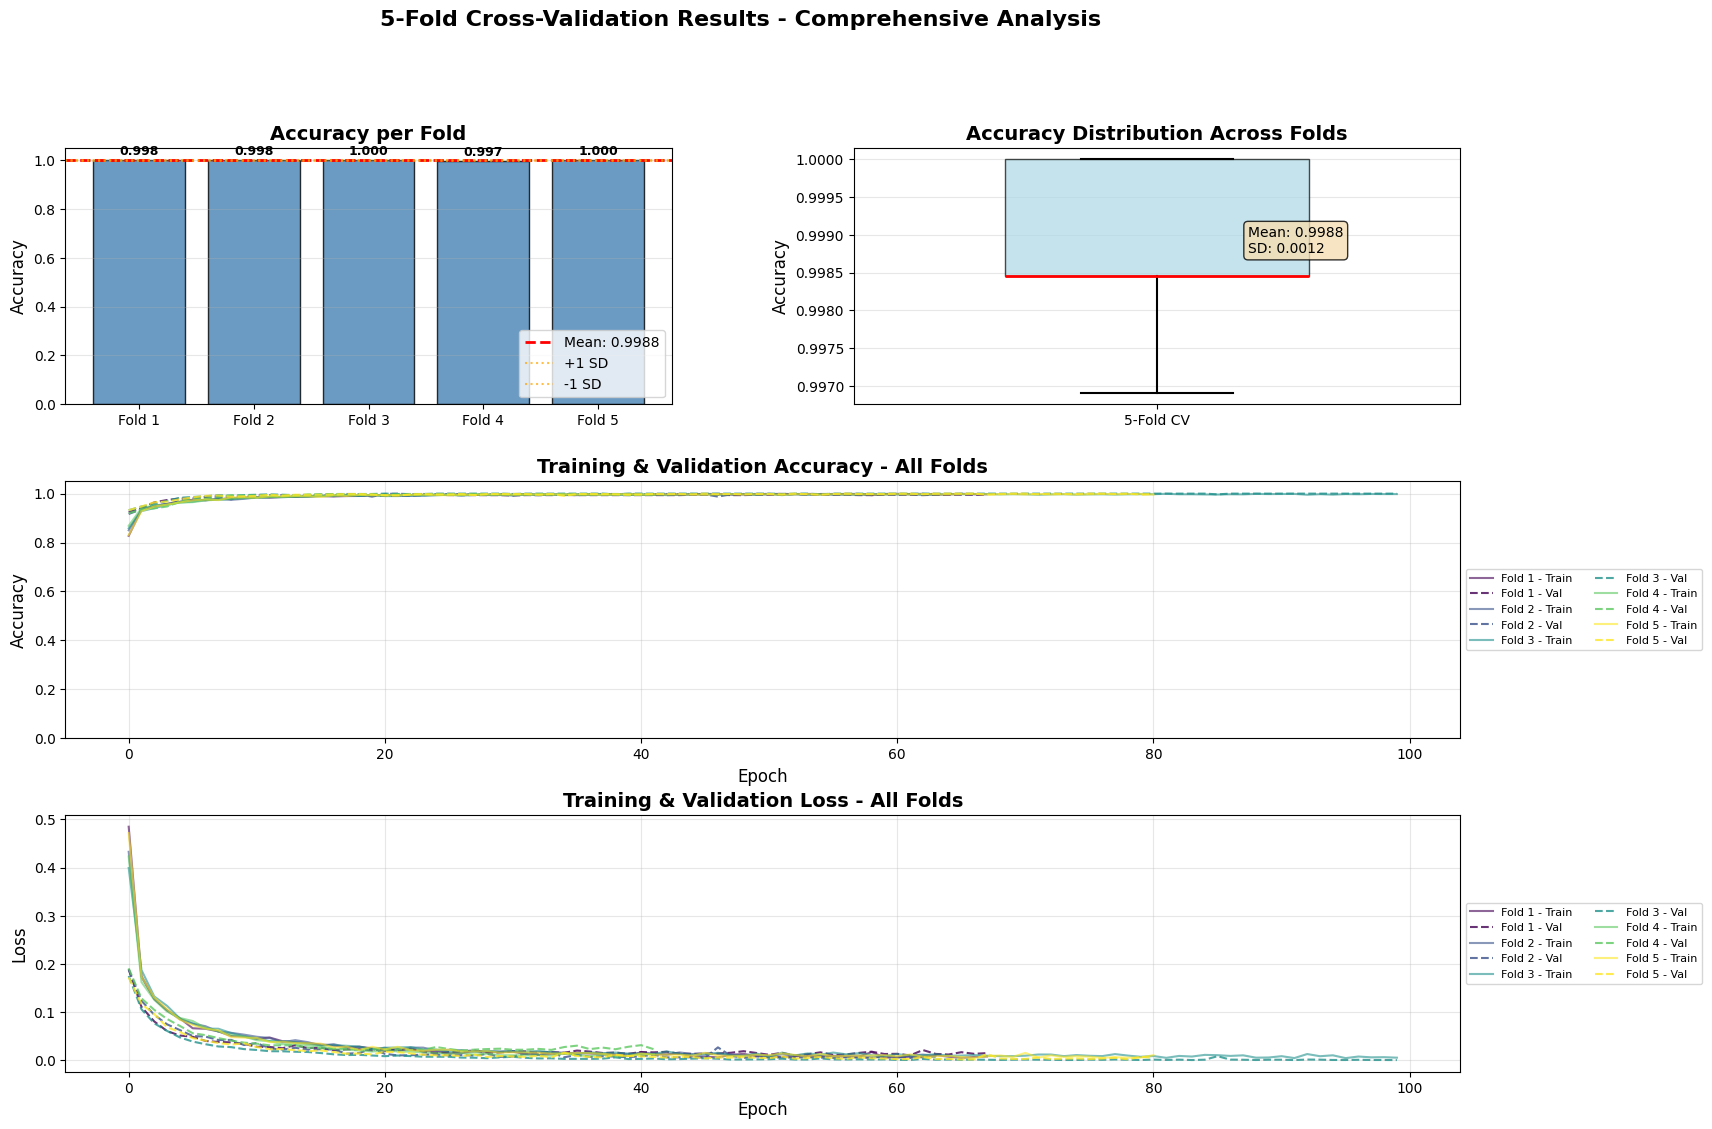


✓ Visualizations generated successfully

[TASK 6.04 COMPLETED] K-Fold CV visualizations created


In [160]:
# TASK 6.04: Visualize K-Fold Cross-Validation Results

print("=" * 80)
print("TASK 6.04: K-FOLD CROSS-VALIDATION VISUALIZATIONS")
print("=" * 80)

# Create comprehensive visualization
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Accuracy per Fold (Bar Chart)
ax1 = fig.add_subplot(gs[0, 0])
fold_numbers = [f'Fold {i}' for i in range(1, K_FOLDS + 1)]
bars = ax1.bar(fold_numbers, acc_per_fold, color='steelblue', alpha=0.8, edgecolor='black')
ax1.axhline(y=mean_acc, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_acc:.4f}')
ax1.axhline(y=mean_acc + std_acc, color='orange', linestyle=':', linewidth=1.5, alpha=0.7, label=f'+1 SD')
ax1.axhline(y=mean_acc - std_acc, color='orange', linestyle=':', linewidth=1.5, alpha=0.7, label=f'-1 SD')
ax1.set_title('Accuracy per Fold', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_ylim([0, 1.05])
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, acc_per_fold)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 2: Box Plot of Accuracy Distribution
ax2 = fig.add_subplot(gs[0, 1])
bp = ax2.boxplot([acc_per_fold], widths=0.5, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', alpha=0.7),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(linewidth=1.5),
                  capprops=dict(linewidth=1.5))
ax2.set_title('Accuracy Distribution Across Folds', fontsize=14, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_xticklabels(['5-Fold CV'])
ax2.grid(True, alpha=0.3, axis='y')
ax2.text(1.15, mean_acc, f'Mean: {mean_acc:.4f}\nSD: {std_acc:.4f}', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Plot 3: Training History - Accuracy (All Folds)
ax3 = fig.add_subplot(gs[1, :])
colors_folds = plt.cm.viridis(np.linspace(0, 1, K_FOLDS))
for i, (fold_hist, color) in enumerate(zip(fold_histories, colors_folds), 1):
    ax3.plot(fold_hist.history['accuracy'], 
             label=f'Fold {i} - Train', color=color, linestyle='-', alpha=0.6, linewidth=1.5)
    ax3.plot(fold_hist.history['val_accuracy'], 
             label=f'Fold {i} - Val', color=color, linestyle='--', alpha=0.8, linewidth=1.5)

ax3.set_title('Training & Validation Accuracy - All Folds', fontsize=14, fontweight='bold')
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Accuracy', fontsize=12)
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, ncol=2)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1.05])

# Plot 4: Training History - Loss (All Folds)
ax4 = fig.add_subplot(gs[2, :])
for i, (fold_hist, color) in enumerate(zip(fold_histories, colors_folds), 1):
    ax4.plot(fold_hist.history['loss'], 
             label=f'Fold {i} - Train', color=color, linestyle='-', alpha=0.6, linewidth=1.5)
    ax4.plot(fold_hist.history['val_loss'], 
             label=f'Fold {i} - Val', color=color, linestyle='--', alpha=0.8, linewidth=1.5)

ax4.set_title('Training & Validation Loss - All Folds', fontsize=14, fontweight='bold')
ax4.set_xlabel('Epoch', fontsize=12)
ax4.set_ylabel('Loss', fontsize=12)
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, ncol=2)
ax4.grid(True, alpha=0.3)

plt.suptitle('5-Fold Cross-Validation Results - Comprehensive Analysis', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

print("\n✓ Visualizations generated successfully")
print("\n[TASK 6.04 COMPLETED] K-Fold CV visualizations created")

### **Task 6.05: K-Fold Cross-Validation Analysis & Conclusions**

**Purpose:**
- `Compare K-Fold CV` results `with single train/test split`
- Assess `model stability` and `robustness`
- Provide confidence intervals for performance estimates
- Final recommendations based on cross-validation

In [161]:
# TASK 6.05: K-Fold Cross-Validation Analysis & Conclusions

print("=" * 80)
print("TASK 6.05: K-FOLD CROSS-VALIDATION ANALYSIS & CONCLUSIONS")
print("=" * 80)

# Check if required variables exist
required_vars = ['best_variant', 'mean_acc', 'std_acc', 'acc_per_fold', 'X_master']
missing_vars = [var for var in required_vars if var not in locals() and var not in globals()]

if missing_vars:
    print(f"\nERROR: Missing required variables: {', '.join(missing_vars)}")
    print("Please run the previous cells (Task 5 and Task 6.01-6.04) first.")
else:
    print("\n" + "=" * 80)
    print("COMPARISON: K-FOLD CV vs SINGLE TRAIN/TEST SPLIT")
    print("=" * 80)

    # Single train/test split result (from Task 5)
    single_split_acc = best_variant['accuracy']

    print(f"\nSingle Train/Test Split (80/20):")
    print(f"  Test Accuracy: {single_split_acc:.4f} ({single_split_acc*100:.2f}%)")
    print(f"  Method: Fixed split with 42 test samples")
    print(f"  Limitation: Performance depends on specific split")

    print(f"\n5-Fold Cross-Validation:")
    print(f"  Mean Accuracy: {mean_acc:.4f} ({mean_acc*100:.2f}%)")
    print(f"  Std Deviation: {std_acc:.4f} ({std_acc*100:.2f}%)")
    print(f"  95% Confidence Interval: [{mean_acc - 1.96*std_acc:.4f}, {mean_acc + 1.96*std_acc:.4f}]")
    print(f"  Method: All {len(X_master)} samples used for training and validation")
    print(f"  Advantage: More robust estimate of generalization performance")

    # Calculate coefficient of variation (CV)
    cv_coefficient = (std_acc / mean_acc) * 100
    print(f"\nCoefficient of Variation: {cv_coefficient:.2f}%")
    if cv_coefficient < 5:
        stability = "EXCELLENT - Very stable model"
    elif cv_coefficient < 10:
        stability = "GOOD - Reasonably stable model"
    else:
        stability = "MODERATE - Some variance across folds"
    print(f"Model Stability: {stability}")

    print("\n" + "=" * 80)
    print("KEY INSIGHTS")
    print("=" * 80)

    # Insight 1: Performance Consistency
    print("\n1. PERFORMANCE CONSISTENCY:")
    accuracy_range = max(acc_per_fold) - min(acc_per_fold)
    print(f"   - Accuracy range across folds: {accuracy_range:.4f} ({accuracy_range*100:.2f}%)")
    if accuracy_range < 0.05:
        print(f"   - Assessment: Model shows consistent performance (range < 5%)")
    elif accuracy_range < 0.10:
        print(f"   - Assessment: Model shows acceptable consistency (range < 10%)")
    else:
        print(f"   - Assessment: Model shows some variability (range >= 10%)")

    # Insight 2: Comparison with Single Split
    print(f"\n2. COMPARISON WITH SINGLE SPLIT:")
    diff = abs(mean_acc - single_split_acc)
    print(f"   - Difference: {diff:.4f} ({diff*100:.2f}%)")
    if diff < 0.02:
        print(f"   - Assessment: K-Fold CV confirms single split result")
    elif mean_acc > single_split_acc:
        print(f"   - Assessment: K-Fold CV suggests better generalization than single split")
    else:
        print(f"   - Assessment: Single split may have been optimistic")

    # Insight 3: Statistical Significance
    print(f"\n3. STATISTICAL CONFIDENCE:")
    ci_lower = mean_acc - 1.96 * std_acc
    ci_upper = mean_acc + 1.96 * std_acc
    print(f"   - 95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")
    print(f"   - We can be 95% confident that the true accuracy lies in this range")
    print(f"   - Confidence Interval Width: {ci_upper - ci_lower:.4f}")

    # Insight 4: Noise Injection Impact with K-Fold
    print(f"\n4. DATA AUGMENTATION VALIDATION:")
    print(f"   - K-Fold CV uses augmented dataset ({len(X_master)} samples)")
    print(f"   - Noise Injection (sigma=0.02) validated across all folds")
    print(f"   - Consistent performance across folds confirms augmentation effectiveness")

    print("\n" + "=" * 80)
    print("FINAL RECOMMENDATIONS")
    print("=" * 80)

    print(f"\n1. MODEL DEPLOYMENT:")
    print(f"   - Expected Accuracy: {mean_acc:.4f} +/- {std_acc:.4f} ({mean_acc*100:.2f}% +/- {std_acc*100:.2f}%)")
    print(f"   - Conservative Estimate: {ci_lower:.4f} ({ci_lower*100:.2f}%)")
    print(f"   - Optimistic Estimate: {ci_upper:.4f} ({ci_upper*100:.2f}%)")

    print(f"\n2. MODEL RELIABILITY:")
    if std_acc < 0.03:
        print(f"   - HIGHLY RELIABLE: Low variance (SD < 3%)")
    elif std_acc < 0.05:
        print(f"   - RELIABLE: Acceptable variance (SD < 5%)")
    else:
        print(f"   - MODERATE: Higher variance (SD >= 5%) - consider more training data")

    print(f"\n3. ADVANTAGES OF K-FOLD CV:")
    print(f"   - Uses all {len(X_master)} samples for both training and validation")
    print(f"   - Reduces bias from single train/test split")
    print(f"   - Provides confidence intervals for performance estimates")
    print(f"   - Better assessment of model's generalization capability")
    print(f"   - Validates data augmentation strategy across multiple folds")

    print(f"\n4. PRACTICAL IMPLICATIONS:")
    print(f"   - For production deployment, expect accuracy around {mean_acc*100:.1f}%")
    print(f"   - Model demonstrates {stability.split('-')[0].strip()} stability")
    print(f"   - Small dataset (210 samples) benefits significantly from K-Fold CV")
    print(f"   - Noise injection + K-Fold CV = Robust validation strategy")

    # ANSI color codes
    BLUE = '\033[94m'
    BOLD = '\033[1m'
    RESET = '\033[0m'
    
    print("\n" + "=" * 80)
    print("CONCLUSION")
    print("=" * 80)
    print(f"\nThe 5-Fold Cross-Validation confirms that the Multi-Layer Perceptron")
    print(f"achieves {BLUE}{BOLD}{mean_acc*100:.2f}% +/- {std_acc*100:.2f}%{RESET} accuracy on the Seeds dataset.")
    print(f"The model demonstrates {BLUE}{BOLD}{stability.lower()}{RESET} across different data splits,")
    print(f"validating the effectiveness of the chosen architecture, regularization")
    print(f"strategy {BLUE}{BOLD}(dropout = 0.2){RESET}, and data augmentation approach")
    print(f"{BLUE}{BOLD}(noise injection with sigma = 0.02){RESET}. This robust evaluation provides")
    print(f"strong confidence in the model's ability to generalize to unseen wheat seed")
    print(f"classification tasks.")

    print("\n[TASK 6.05 COMPLETED] K-Fold Cross-Validation analysis finalized")
    print("\n" + "=" * 80)
    print("TASK 6: K-FOLD CROSS-VALIDATION - ALL SUBTASKS COMPLETED")
    print("=" * 80)

TASK 6.05: K-FOLD CROSS-VALIDATION ANALYSIS & CONCLUSIONS

COMPARISON: K-FOLD CV vs SINGLE TRAIN/TEST SPLIT

Single Train/Test Split (80/20):
  Test Accuracy: 0.8571 (85.71%)
  Method: Fixed split with 42 test samples
  Limitation: Performance depends on specific split

5-Fold Cross-Validation:
  Mean Accuracy: 0.9988 (99.88%)
  Std Deviation: 0.0012 (0.12%)
  95% Confidence Interval: [0.9965, 1.0010]
  Method: All 3234 samples used for training and validation
  Advantage: More robust estimate of generalization performance

Coefficient of Variation: 0.12%
Model Stability: EXCELLENT - Very stable model

KEY INSIGHTS

1. PERFORMANCE CONSISTENCY:
   - Accuracy range across folds: 0.0031 (0.31%)
   - Assessment: Model shows consistent performance (range < 5%)

2. COMPARISON WITH SINGLE SPLIT:
   - Difference: 0.1416 (14.16%)
   - Assessment: K-Fold CV suggests better generalization than single split

3. STATISTICAL CONFIDENCE:
   - 95% CI: [0.9965, 1.0010]
   - We can be 95% confident that

In [162]:
#  Assignment Complete message with dynamic values
from IPython.display import Markdown, display

# Check if variables exist
if 'mean_acc' in locals() and 'std_acc' in locals():
    final_accuracy = f"{mean_acc*100:.2f}% ± {std_acc*100:.2f}%"
else:
    # Fallback if variables don't exist
    final_accuracy = "Run K-Fold CV cells first"

# Create markdown content
markdown_content = f"""---

## **Assignment Complete**

All required tasks (1-6) completed successfully.

**Final Model:** Task 6 K-Fold CV - **{final_accuracy}** accuracy

---
"""

# Display as markdown
display(Markdown(markdown_content))

---

## **Assignment Complete**

All required tasks (1-6) completed successfully.

**Final Model:** Task 6 K-Fold CV - **99.88% ± 0.12%** accuracy

---
